# External modules

In [63]:
library(tidyverse)
library(readr)
library(DescTools)
library(Hmisc)

# Internal functions

In [64]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))


In [65]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [66]:
data <- xfun::in_dir(dir = path, expr = read_csv("./04_experimentation_02/final_dataset.csv"))

Rows: 21452 Columns: 59
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (59): timestamp, latitude, longitude, velocity_latitude, velocity_longit...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [67]:
str(data)

spc_tbl_ [21,452 × 59] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ timestamp             : num [1:21452] 3.16e+08 3.16e+08 3.16e+08 3.16e+08 3.16e+08 ...
 $ latitude              : num [1:21452] 48.8 48.8 48.8 48.8 48.8 ...
 $ longitude             : num [1:21452] 2.47 2.47 2.47 2.47 2.47 ...
 $ velocity_latitude     : num [1:21452] -1.22e-11 -1.56e-11 -1.12e-11 -1.09e-11 -1.39e-11 ...
 $ velocity_longitude    : num [1:21452] 6.17e-11 8.17e-11 6.14e-11 6.17e-11 8.12e-11 ...
 $ velocity              : num [1:21452] 6.29e-11 8.32e-11 6.24e-11 6.27e-11 8.24e-11 ...
 $ lateral_error         : num [1:21452] -0.169 -0.139 -0.17 -0.178 -0.176 ...
 $ longitudinal_error    : num [1:21452] -0.446 -0.452 -0.443 -0.438 -0.439 ...
 $ haversine_error       : num [1:21452] 0.476 0.473 0.474 0.472 0.472 ...
 $ latitude_error        : num [1:21452] -3.56e-06 -3.59e-06 -3.58e-06 -3.42e-06 -3.55e-06 ...
 $ longitude_error       : num [1:21452] -3.20e-06 -3.47e-06 -3.10e-06 -3.83e-06 -3.10e-06 ...
 $ headi

## Response variable

In [68]:
x_raw <- data$lateral_error_abs

In [69]:
coefficient_iqr <- 9
method <- c("interpolate", "mode", "median", "mean")[1]

In [70]:
x_raw_object <- impute_outliers(x = x_raw, coefficient_iqr = coefficient_iqr, method = method)

In [71]:
print(names(x_raw_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [72]:
outlier_positions <- x_raw_object$outlier_positions

In [73]:
print(outlier_positions)

  [1]  2299  2300  2301  2302  2303  2304  2305  2306  2307  2308  2309  2310
 [13]  2311  2312  2313  2314  2315  2316  2317  2318  2319  2320  2321  2322
 [25]  2323  2324  2325  2326  2327  2328  2329  2330  2331  2332  2333  2334
 [37]  2335  2336  2337  2338  2339  2340  2341  2342  2343  2344  2345  2346
 [49]  2347  2348  2349  2350  2351  2352  2353  2354  2355  2356  2357  2358
 [61]  2359  2360  2361  2362  2363  2364  2365  2366  2367  2368  2369  2622
 [73]  2623  2624  2625  2626  2627  2628  2629  2630  2631  2632  2633  2634
 [85]  2635  2636  2637  2638  2639  2640  2641  2642  2643  2644  2645  2646
 [97]  2647  2648  2649  2650  2651  2652  3364  3365  3366  3367  3368  3369
[109]  3370  3371  3372  3373  3374  3375  3376  3377  3378 15398 15399 15400
[121] 15401 15402 15403 15404 15405 15406 15407 15408 15409 15410 15411 15412
[133] 15413 15414 15415 15416 15417 15418 15419 15420 15421 15422 15423 15424
[145] 15425 15426 15427 15428 15429 15430 15431 15432 15433 1543

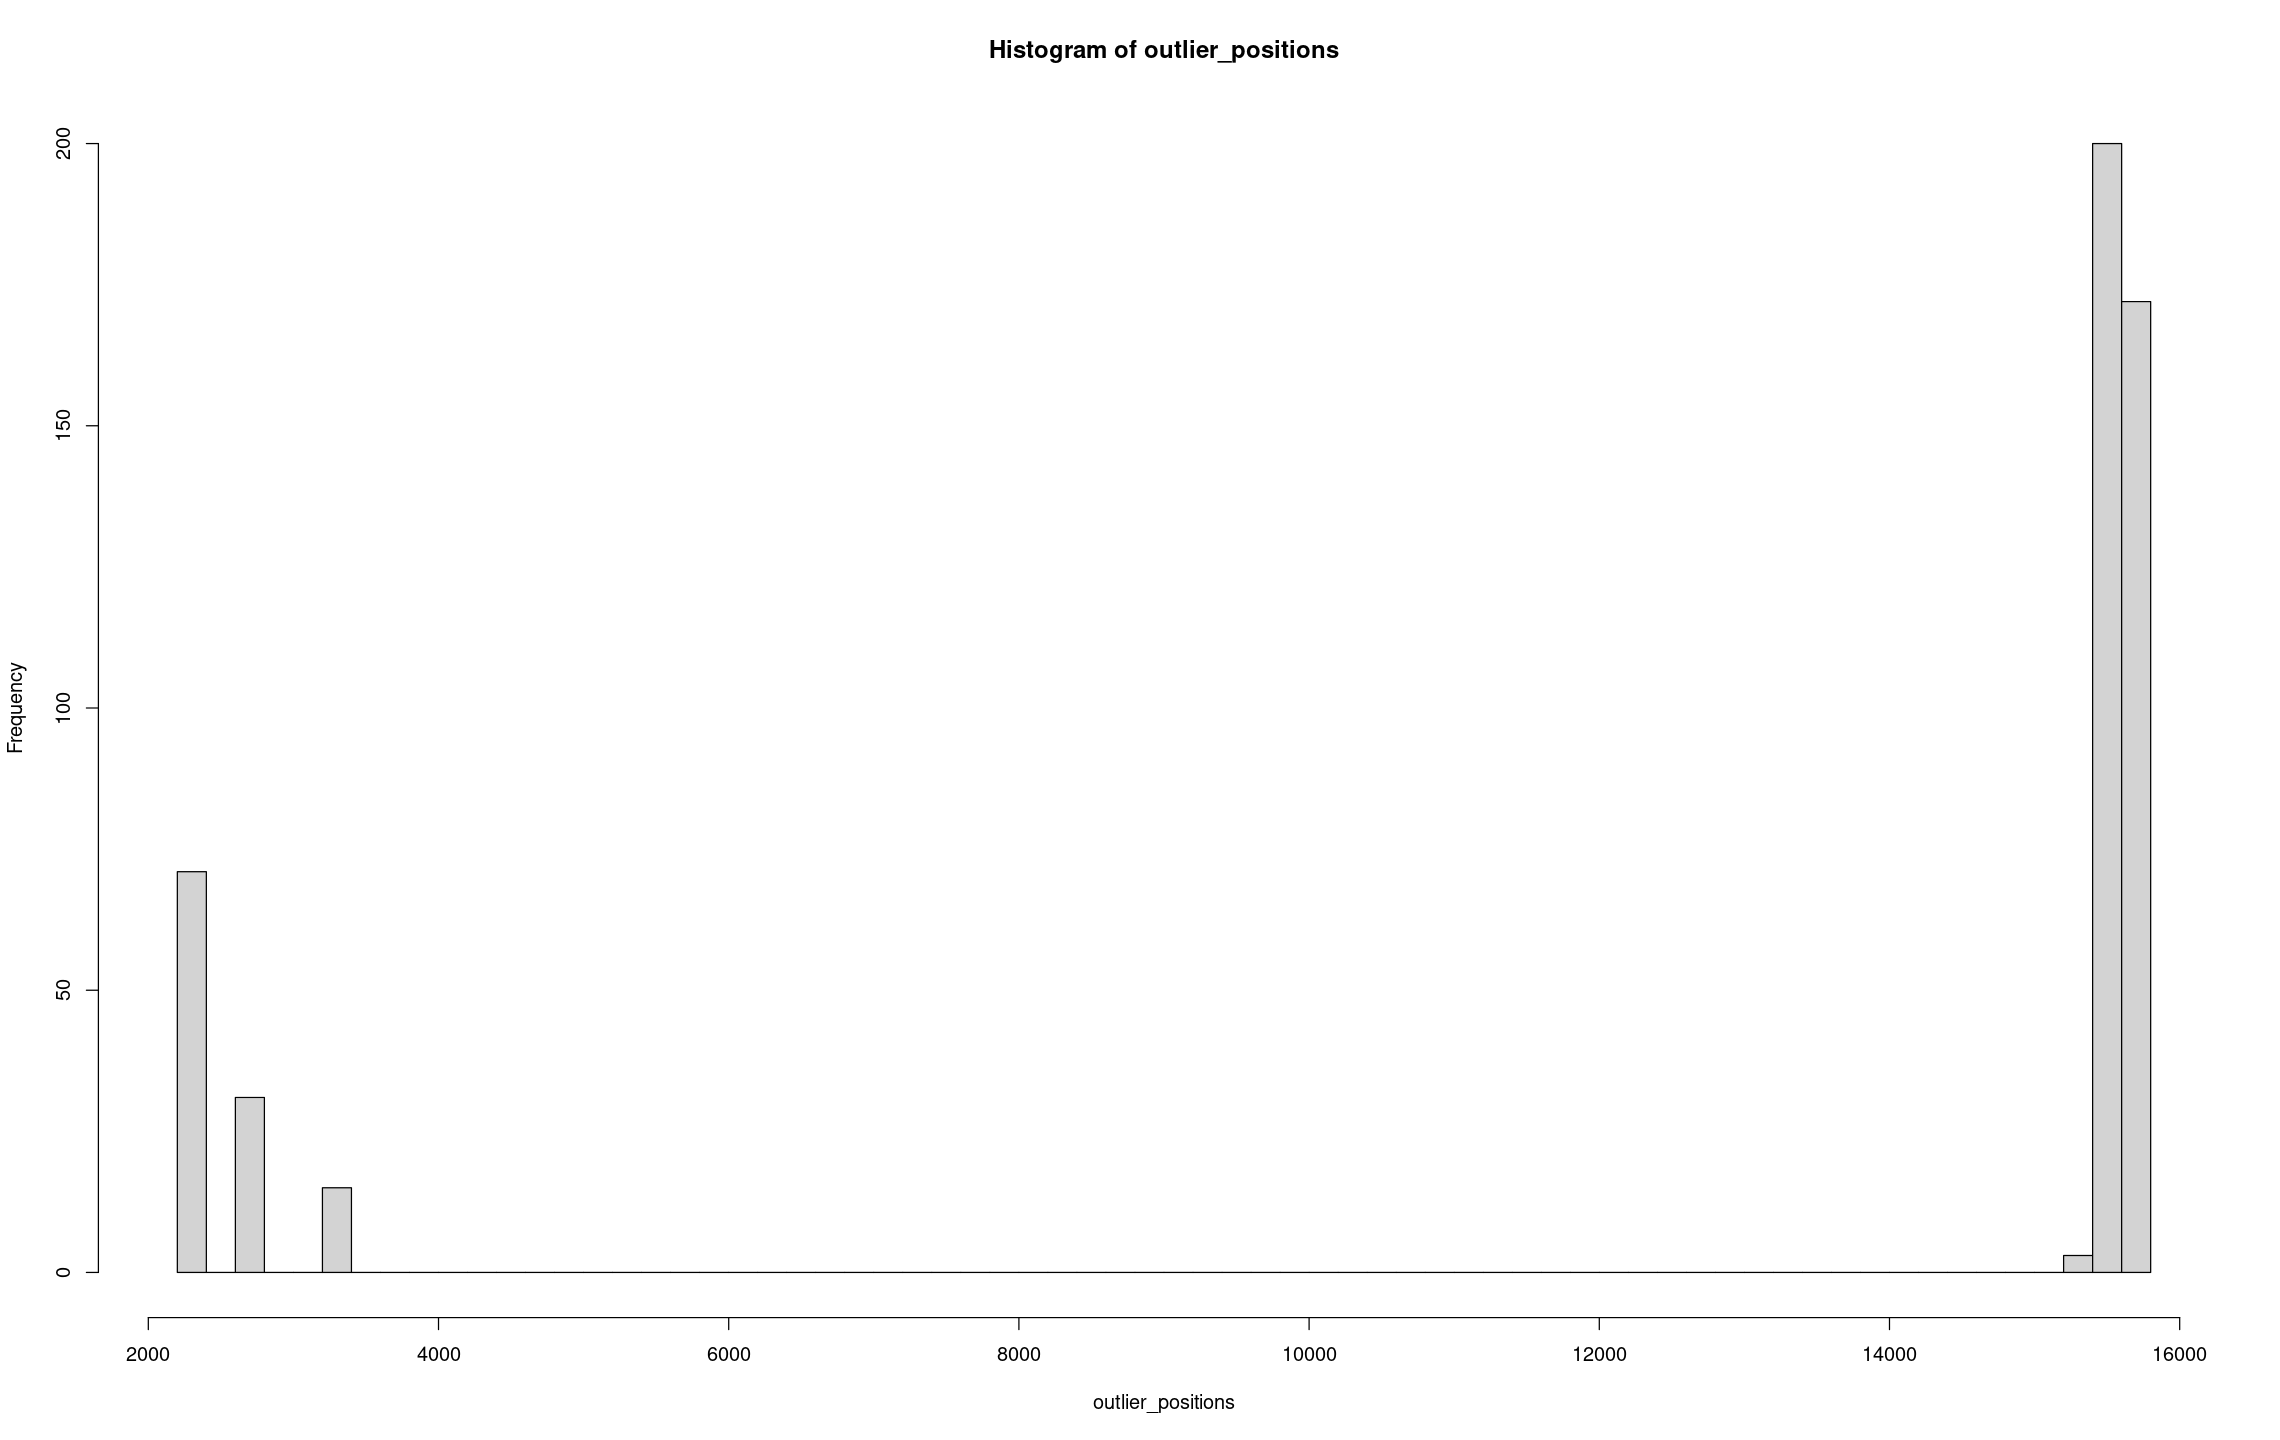

In [74]:
options(repr.plot.width=19, repr.plot.height=12)

hist(outlier_positions, nclass = 50)

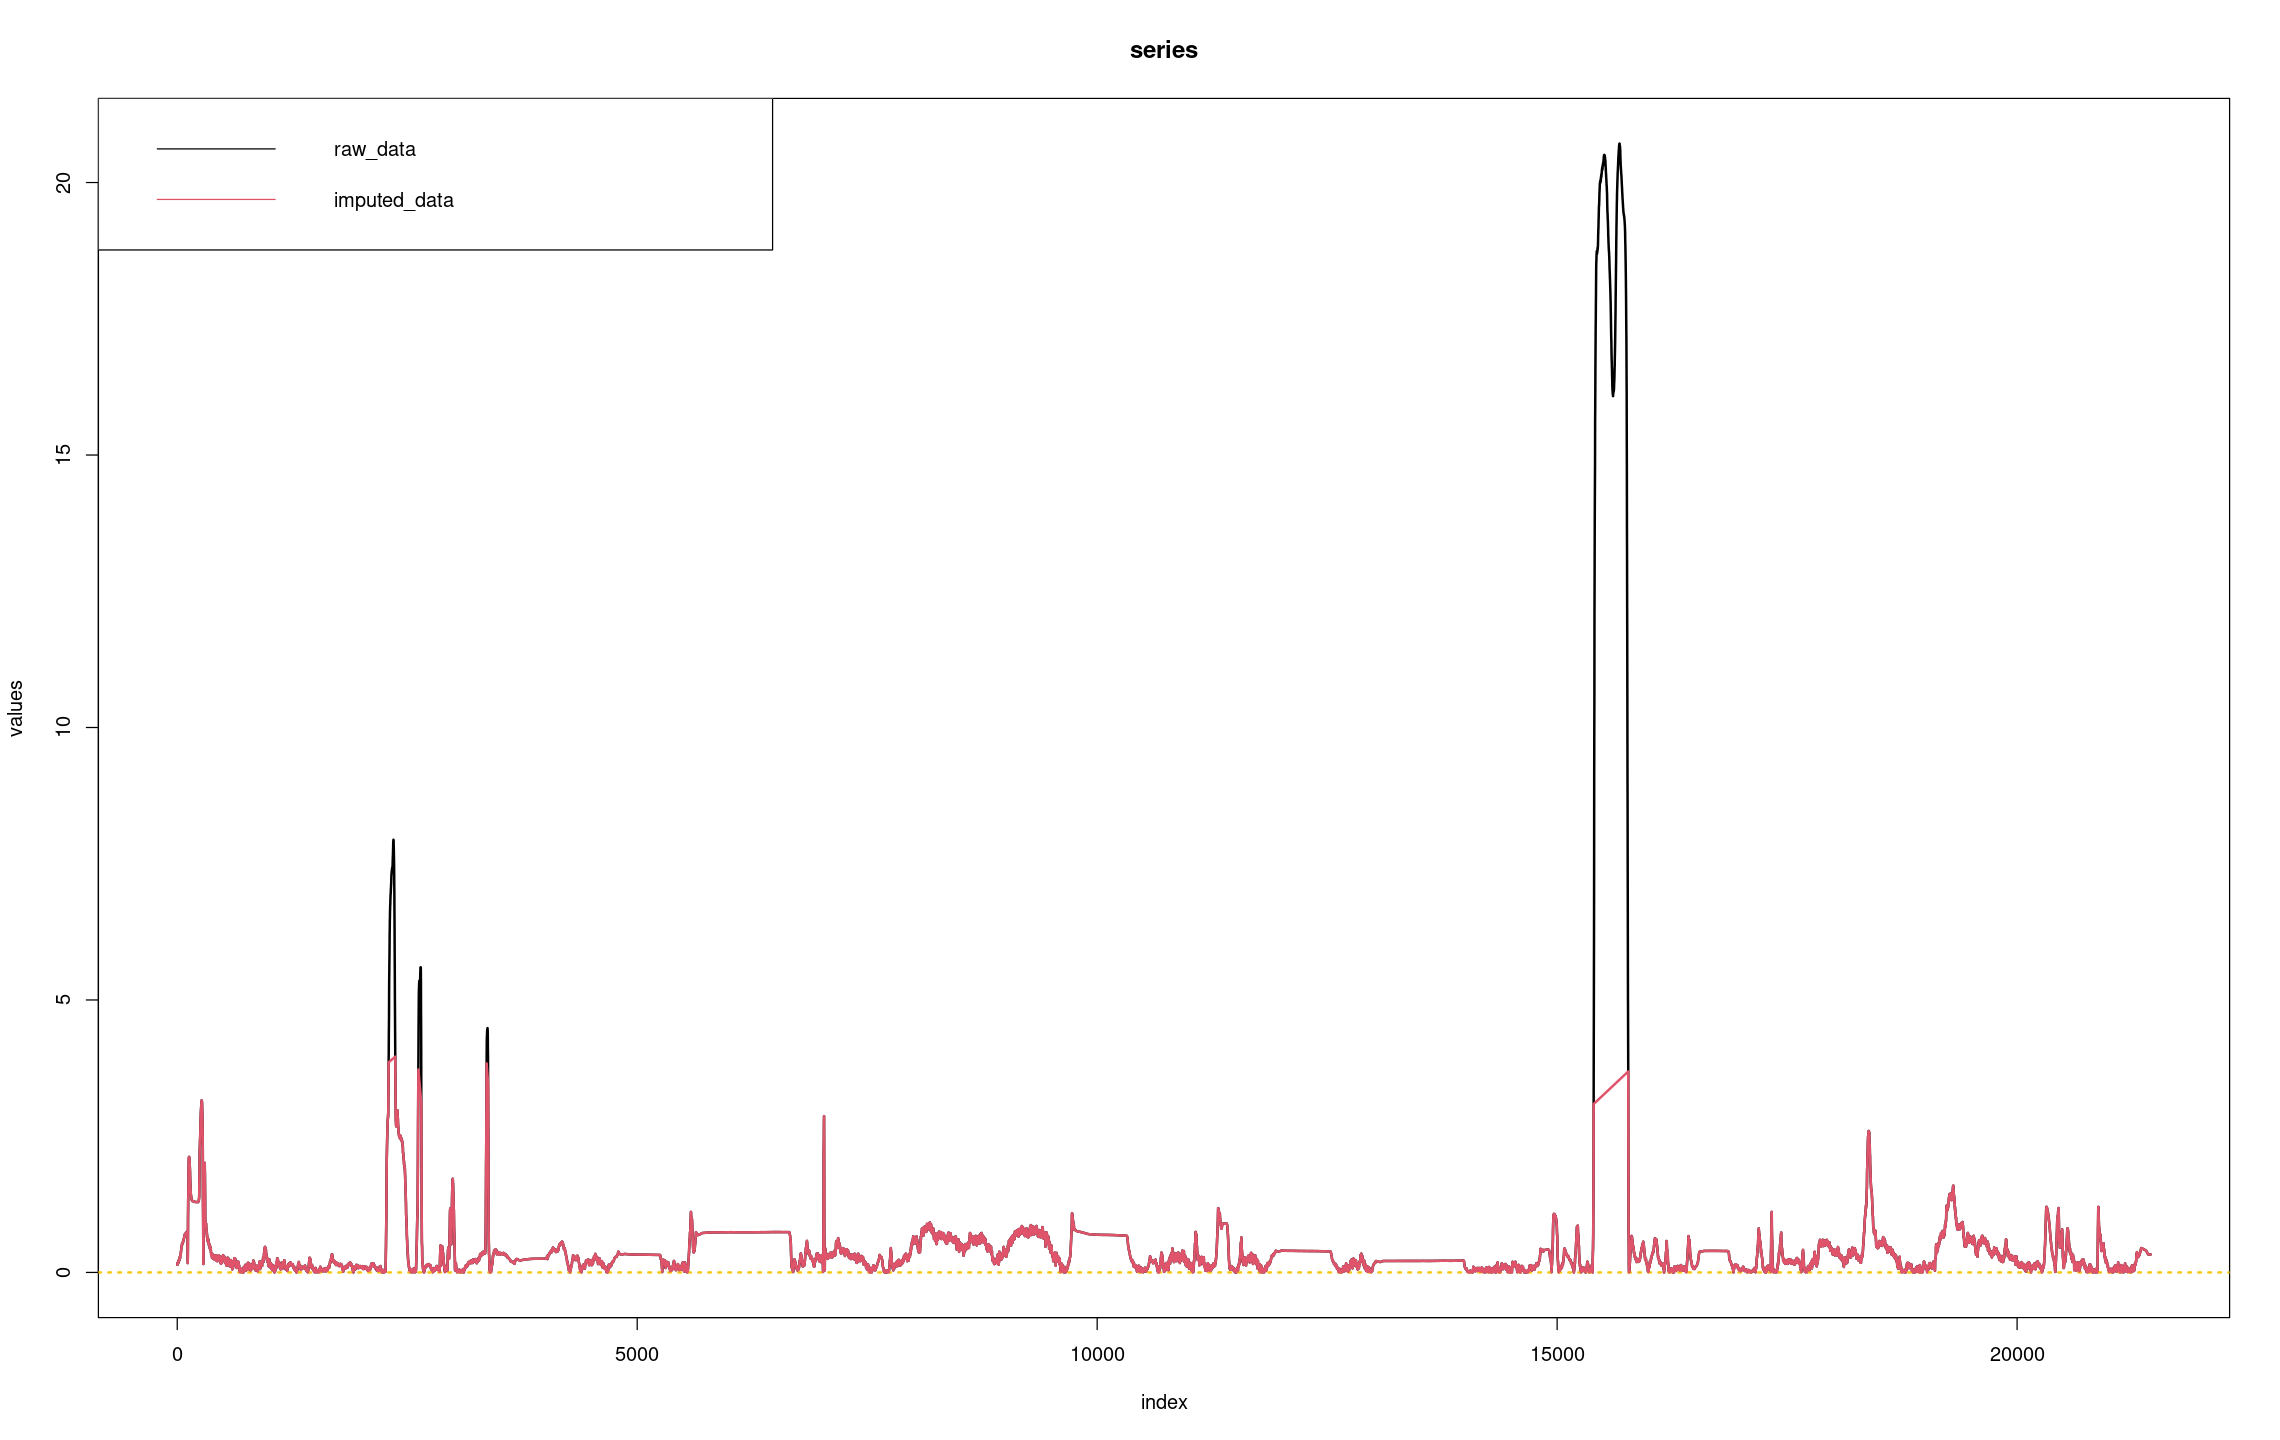

In [75]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x_raw_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(x_raw_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

In [76]:
# data with imputed outliers
x <- x_raw_object$imputed_data 
data_clean <- data
n <- length(x)

In [77]:
# data with removed outliers
# x <- x_raw[-outlier_positions]
# n <- length(x)
# data_clean <- data[-outlier_positions, ]

------------------------------------------------------------------------------ 
x (numeric)

           length                n              NAs           unique'
           21'452           21'452                0           20'803
                            100.0%             0.0%                 
                                                                    
              .05              .10              .25           median
  0.0245297991671  0.0475101500749  0.1158896163102  0.2515075504780
                                                                    
            range               sd            vcoef              mad
  3.9598087917620  0.5933541335701  1.4081406260983  0.2324148830388
                                                                    
               0s             mean            meanCI
                0  0.4213742026705   0.4134336144592
             0.0%                    0.4293147908817
                                                    
    

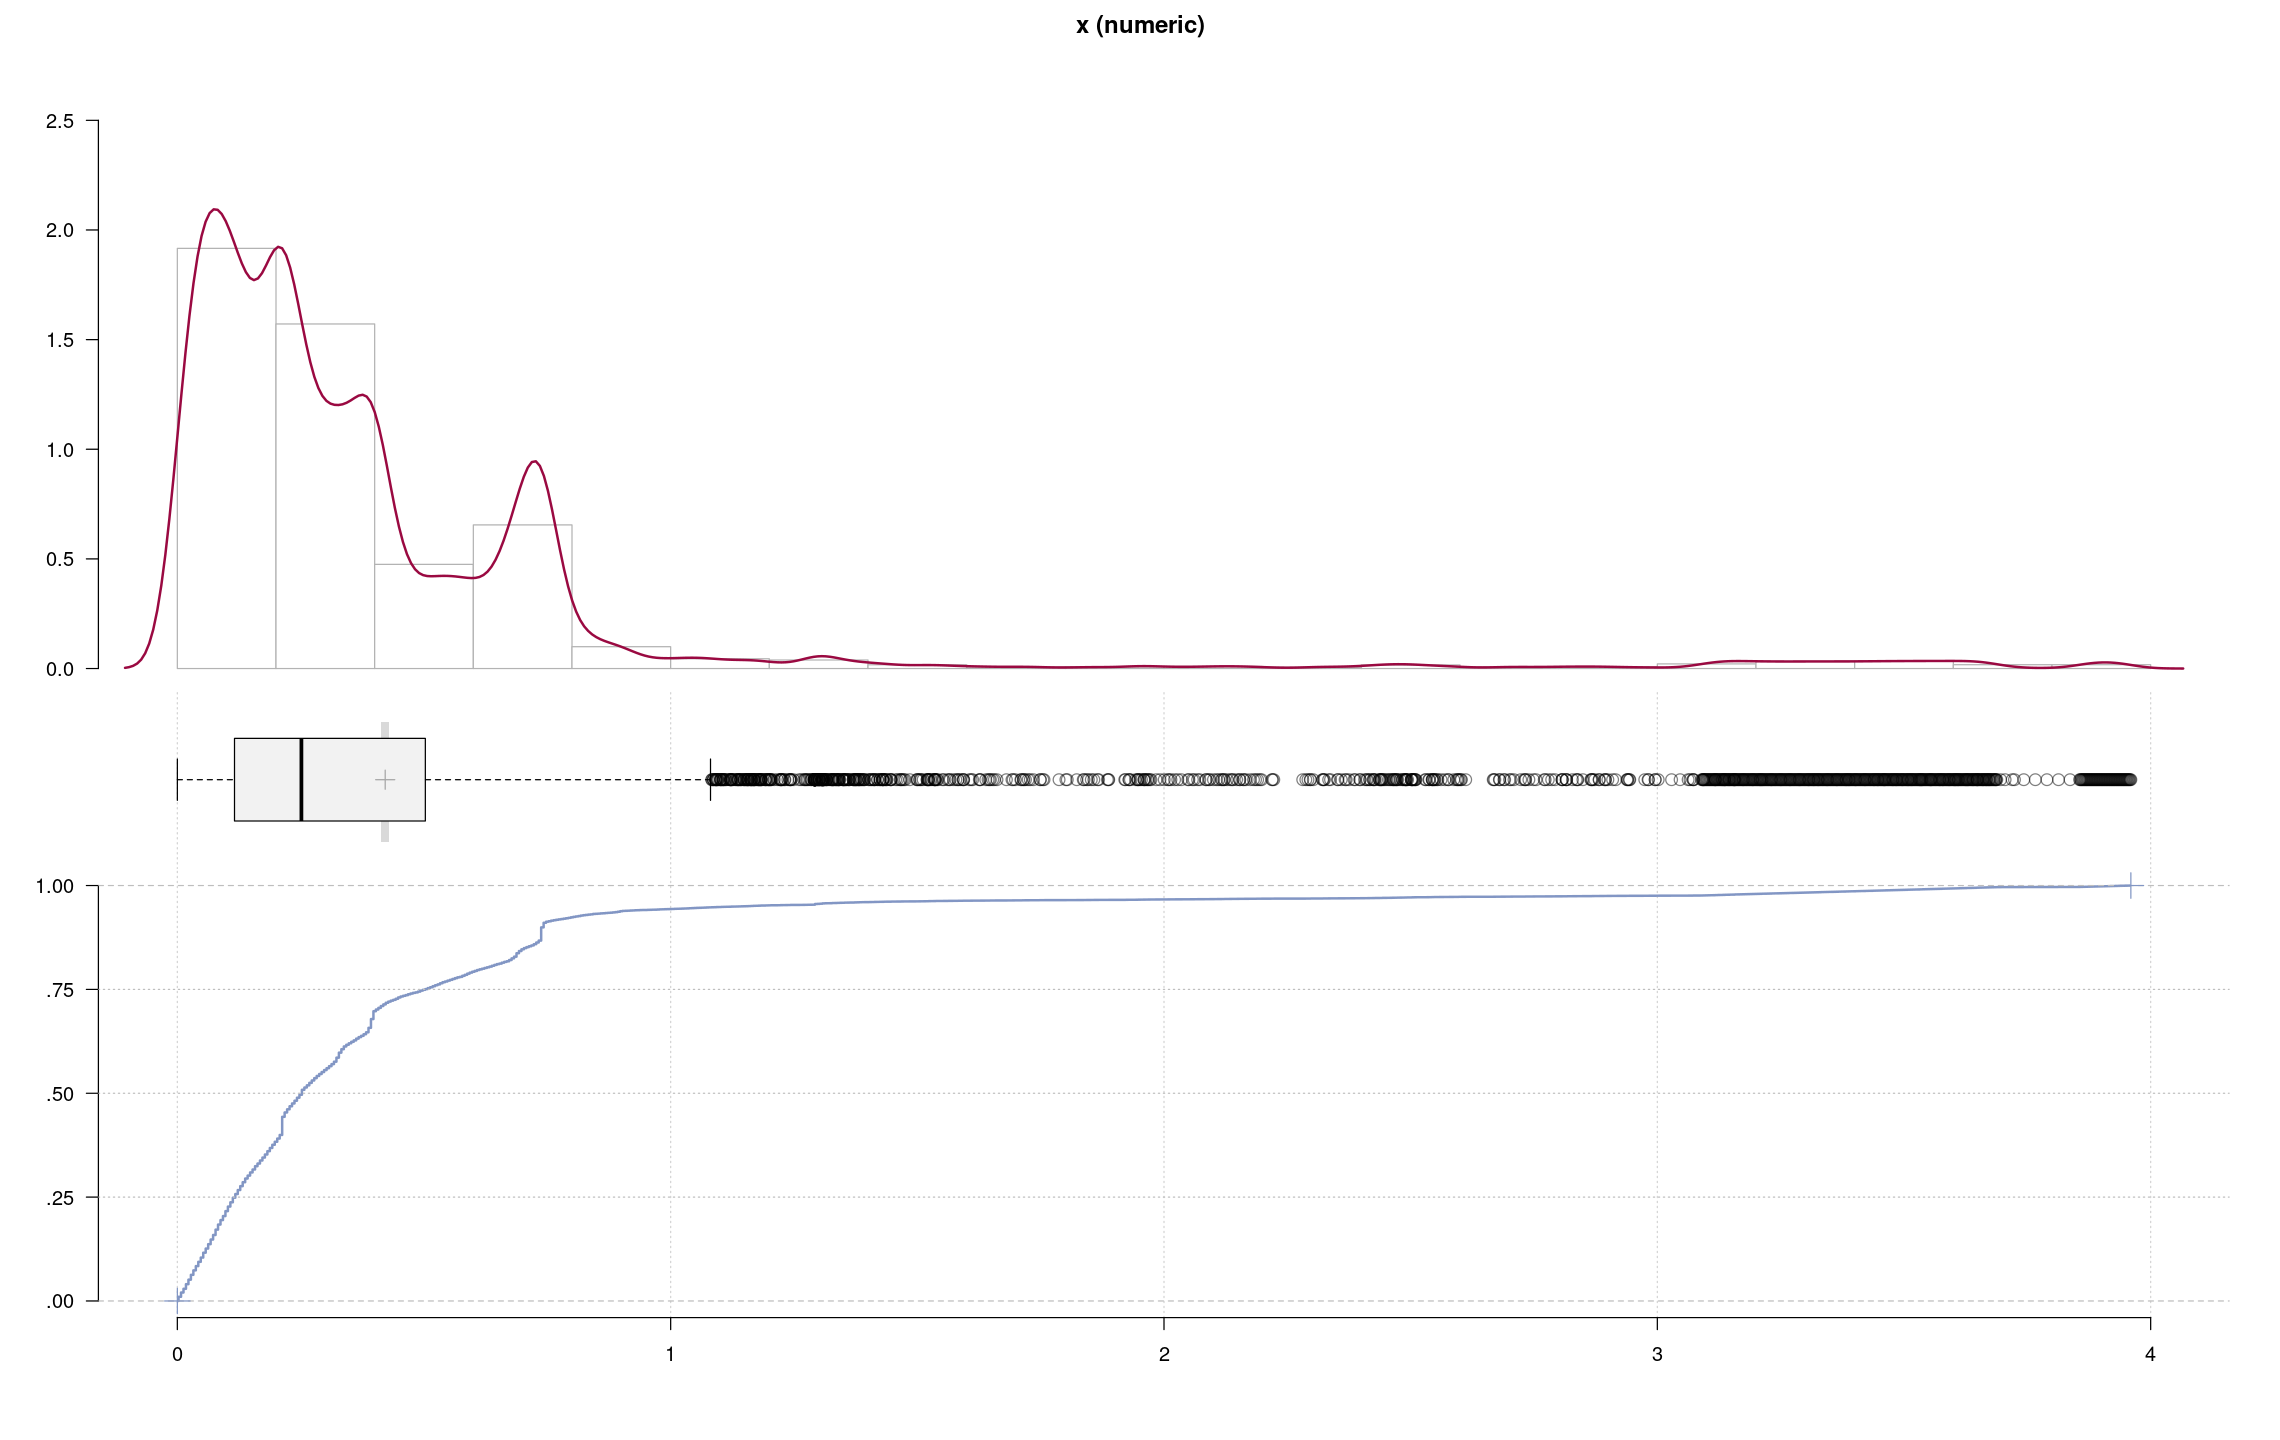

In [78]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

In [79]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# nlargest <- 3000
# y <- extract_nlargest_sample(x, n = nlargest)
# Desc(y)

## Predictor variables

In [82]:
# select the predictor variables
data_covariates <- data_clean %>% select(!c(timestamp, latitude, longitude, velocity_latitude, velocity_longitude,
                                            lateral_error, longitudinal_error, haversine_error, latitude_error,
                                            longitude_error, heading_error, lateral_error_abs, longitudinal_error_abs,
                                            haversine_error_abs, latitude_error_abs, longitude_error_abs, heading_error_abs))

str(data_covariates)

tibble [21,452 × 42] (S3: tbl_df/tbl/data.frame)
 $ velocity             : num [1:21452] 6.29e-11 8.32e-11 6.24e-11 6.27e-11 8.24e-11 ...
 $ area                 : num [1:21452] 0.667 0.709 0.554 0.688 0.718 ...
 $ object               : num [1:21452] 59 58 52 51 51 51 54 50 57 51 ...
 $ name_airplane        : num [1:21452] 1 1 0 0 1 0 0 0 1 0 ...
 $ name_bench           : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_bench..group.   : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_bicycle         : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_bird            : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_bird..group.    : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_boat            : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_bus             : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_car             : num [1:21452] 7 6 6 6 5 5 6 5 5 6 ...
 $ name_car..group.     : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_dog             : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_el

In [81]:
# select the predictor variables
#data_covariates <- data_clean %>% select(c(velocity, object, area))

#str(data_covariates)

tibble [21,452 × 3] (S3: tbl_df/tbl/data.frame)
 $ velocity: num [1:21452] 6.29e-11 8.32e-11 6.24e-11 6.27e-11 8.24e-11 ...
 $ object  : num [1:21452] 59 58 52 51 51 51 54 50 57 51 ...
 $ area    : num [1:21452] 0.667 0.709 0.554 0.688 0.718 ...


In [83]:
# Remove columns containing only zeros
# data_covariates_clean <- data_covariates %>% select(where(~ sum(.) != 0))
data_covariates_clean <- data_covariates %>% select_if(colSums(.) != 0)

str(data_covariates_clean)

tibble [21,452 × 41] (S3: tbl_df/tbl/data.frame)
 $ velocity             : num [1:21452] 6.29e-11 8.32e-11 6.24e-11 6.27e-11 8.24e-11 ...
 $ area                 : num [1:21452] 0.667 0.709 0.554 0.688 0.718 ...
 $ object               : num [1:21452] 59 58 52 51 51 51 54 50 57 51 ...
 $ name_airplane        : num [1:21452] 1 1 0 0 1 0 0 0 1 0 ...
 $ name_bench           : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_bench..group.   : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_bicycle         : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_bird            : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_boat            : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_bus             : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_car             : num [1:21452] 7 6 6 6 5 5 6 5 5 6 ...
 $ name_car..group.     : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_dog             : num [1:21452] 0 0 0 0 0 0 0 0 0 0 ...
 $ name_electric.pole   : num [1:21452] 6 8 10 6 7 7 7 10 6 7 ...
 $ name_

In [24]:
# describe(data_covariates_clean)

In [84]:
# scale all predictors variables

data_covariates_clean_scaled <- get_standard_scaled_data(data_covariates_clean, newdata = NULL)

str(data_covariates_clean_scaled)

'data.frame':	21452 obs. of  41 variables:
 $ velocity             : num  0.134 0.606 0.123 0.129 0.586 ...
 $ area                 : num  -0.777 -0.658 -1.097 -0.719 -0.633 ...
 $ object               : num  1.494 1.414 0.933 0.852 0.852 ...
 $ name_airplane        : num  3.147 3.147 -0.318 -0.318 3.147 ...
 $ name_bench           : num  -0.265 -0.265 -0.265 -0.265 -0.265 ...
 $ name_bench..group.   : num  -0.098 -0.098 -0.098 -0.098 -0.098 ...
 $ name_bicycle         : num  -0.418 -0.418 -0.418 -0.418 -0.418 ...
 $ name_bird            : num  -0.161 -0.161 -0.161 -0.161 -0.161 ...
 $ name_boat            : num  -0.0432 -0.0432 -0.0432 -0.0432 -0.0432 ...
 $ name_bus             : num  -0.494 -0.494 -0.494 -0.494 -0.494 ...
 $ name_car             : num  -0.188 -0.482 -0.482 -0.482 -0.777 ...
 $ name_car..group.     : num  -0.822 -0.822 -0.822 -0.822 -0.822 ...
 $ name_dog             : num  -0.0538 -0.0538 -0.0538 -0.0538 -0.0538 ...
 $ name_electric.pole   : num  2.41 3.53 4.64 2.41

# Model selection

## Candidate block sizes

In [85]:
minimum_block_size <- find_minimum_block_size(x, threshold = min(x))

print(minimum_block_size)

[1] 3


In [86]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x, m = 50)

print(maximum_block_size)

[1] 429


In [87]:
maxima <- extract_block_maxima(x, block_size = minimum_block_size)

print(min(maxima))

[1] 0.004526020028


In [88]:
print(median(x))

[1] 0.2515075505


In [89]:
print(calculate_mode(x))

[1] 0.0736187521


In [90]:
candidate_block_sizes <- get_candidate_block_sizes(x, threshold = min(x), m = 50)

print(candidate_block_sizes)

  [1]   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
 [19]  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
 [37]  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
 [55]  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
 [73]  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
 [91]  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
[109] 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
[127] 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
[145] 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
[163] 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
[181] 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
[199] 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
[217] 219 220 221 222 223 224 225 226 227 228 229 230 231 232 23

## Hyperparameters

In [91]:
use.phi <- TRUE
nlargest <- Inf
block_sizes <- NULL
minimum_nblocks <- 50
threshold <- min(x)
confidence_level <- 0.95
use_extremal_index <- TRUE
use_uniform_prior <- TRUE
method <- "MLE"

## Candidate models

In [37]:


models_object <- c(list("model_01" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_02" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_03" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~object),
                        
                        "model_04" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_05" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_06" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~area),
                        
                        "model_07" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_08" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_09" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        
                        "model_10" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_11" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~object),
                        "model_12" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~object),

                        "model_13" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_14" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~area),
                        "model_15" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~area),

                        "model_16" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_17" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        "model_18" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        
                        "model_19" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~object),
                        "model_20" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~area),
                        "model_21" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        
                        "model_22" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~1),
                        
                        "model_23" = list("location.fun" = ~object, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_24" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~area),
                        
                        "model_25" = list("location.fun" = ~area, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_26" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~object),

                        "model_27" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~area),
                        "model_28" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~object),

                        
                        "model_29" = list("location.fun" = ~velocity, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_30" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~area),
                        
                        "model_31" = list("location.fun" = ~area, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_32" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        
                        "model_33" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~area),
                        "model_34" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~velocity),
                       
                       
                        "model_35" = list("location.fun" = ~object, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_36" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        
                        "model_37" = list("location.fun" = ~velocity, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_38" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~object),

                        "model_39" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~velocity),
                        "model_40" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~object),
                       
                       
                        "model_41" = list("location.fun" = ~object, "scale.fun" = ~area, "shape.fun" = ~velocity),
                        "model_42" = list("location.fun" = ~object, "scale.fun" = ~velocity, "shape.fun" = ~area),
                        
                        "model_43" = list("location.fun" = ~area, "scale.fun" = ~object, "shape.fun" = ~velocity),
                        "model_44" = list("location.fun" = ~area, "scale.fun" = ~velocity, "shape.fun" = ~object),
                        
                        "model_45" = list("location.fun" = ~velocity, "scale.fun" = ~object, "shape.fun" = ~area),
                        "model_46" = list("location.fun" = ~velocity, "scale.fun" = ~area, "shape.fun" = ~object)))



In [31]:
# models_object

## Estimations

In [32]:
defaultW <- getOption("warn") 

options(warn = -1) 


fitted_models_object <- lapply(models_object, function(model){
    try({
        ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x =x,
                                                                        data = data_covariates_clean_scaled,
                                                                        location.fun = model$location.fun,
                                                                        scale.fun = model$scale.fun,
                                                                        shape.fun = model$shape.fun,
                                                                        use.phi = use.phi,
                                                                        nlargest = nlargest,
                                                                        block_sizes = block_sizes,
                                                                        minimum_nblocks = minimum_nblocks,
                                                                        threshold = threshold,
                                                                        confidence_level = confidence_level,
                                                                        use_extremal_index = use_extremal_index,
                                                                        use_uniform_prior = use_uniform_prior,
                                                                        method = method)

        model_vector <- as.character(model)
        names(model_vector) <- c("location.fun", "scale.fun", "shape.fun")

        information_criteria <- ns_gev_mixture_model_object$information_criteria

        c(model_vector, information_criteria)
    },
        silent = TRUE)

})


options(warn = defaultW)

In [33]:
success <- sapply(fitted_models_object, function(x) !inherits(x, "try-error"))

success

model_01 model_02 model_03 model_04 model_05 model_06 model_07 model_08 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_09 model_10 model_11 model_12 model_13 model_14 model_15 model_16 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_17 model_18 model_19 model_20 model_21 model_22 model_23 model_24 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_25 model_26 model_27 model_28 model_29 model_30 model_31 model_32 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_33 model_34 model_35 model_36 model_37 model_38 model_39 model_40 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_41 model_42 model_43 model_44 model_45 model_46 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE

In [34]:
table(success)

success
TRUE 
  46 

In [35]:
fitted_models_object_success <- fitted_models_object[success]

fitted_models_object_success_df <- do.call(rbind, fitted_models_object_success)

fitted_models_object_success_df <- data.frame("model_names" = rownames(fitted_models_object_success_df),
                                             fitted_models_object_success_df)

rownames(fitted_models_object_success_df) <- 1:nrow(fitted_models_object_success_df)

fitted_models_object_success_df

,model_names,location.fun,scale.fun,shape.fun,AIC,BIC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,model_01,~object,~1,~1,11228.8399085617,12855.4488332227
2,model_02,~1,~object,~1,10953.7192395672,12540.4602984277
3,model_03,~1,~1,~object,10352.293062697,12098.5055847595
4,model_04,~area,~1,~1,10518.1671064732,12025.1724337326
5,model_05,~1,~area,~1,10438.5272770024,11865.7968726608
6,model_06,~1,~1,~area,11589.4799988507,13255.9567893122
7,model_07,~velocity,~1,~1,9678.82332299321,11106.0929186516
8,model_08,~1,~velocity,~1,10732.9224332963,12160.1920289547
9,model_09,~1,~1,~velocity,13316.3605552516,15182.1766747157


In [36]:

# write.csv(x = fitted_models_object_success_df, file = "./fitted_models_information.csv", row.names = FALSE)


# Best model

## Identification

In [33]:


fitted_models_information <- xfun::in_dir(dir = path, expr = read.csv(file = "./04_experimentation_02/fitted_models_information.csv", sep = ","))

str(fitted_models_information)


'data.frame':	46 obs. of  6 variables:
 $ model_names : chr  "model_01" "model_02" "model_03" "model_04" ...
 $ location.fun: chr  "~object" "~1" "~1" "~area" ...
 $ scale.fun   : chr  "~1" "~object" "~1" "~1" ...
 $ shape.fun   : chr  "~1" "~1" "~object" "~1" ...
 $ AIC         : num  11229 10954 10352 10518 10439 ...
 $ BIC         : num  12855 12540 12099 12025 11866 ...


In [34]:
fitted_models_information

model_names,location.fun,scale.fun,shape.fun,AIC,BIC
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
model_01,~object,~1,~1,11228.839909,12855.448833
model_02,~1,~object,~1,10953.719240,12540.460298
model_03,~1,~1,~object,10352.293063,12098.505585
model_04,~area,~1,~1,10518.167106,12025.172434
model_05,~1,~area,~1,10438.527277,11865.796873
model_06,~1,~1,~area,11589.479999,13255.956789
model_07,~velocity,~1,~1,9678.823323,11106.092919
model_08,~1,~velocity,~1,10732.922433,12160.192029
model_09,~1,~1,~velocity,13316.360555,15182.176675


In [35]:
rank <- order(fitted_models_information$AIC)

fitted_models_information_sorted <- fitted_models_information %>% slice(rank)

fitted_models_information_sorted

model_names,location.fun,scale.fun,shape.fun,AIC,BIC
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
model_22,~1,~1,~1,5513.711796,6047.941197
model_07,~velocity,~1,~1,9678.823323,11106.092919
model_16,~velocity,~velocity,~1,9732.965437,11590.807983
model_03,~1,~1,~object,10352.293063,12098.505585
model_05,~1,~area,~1,10438.527277,11865.796873
model_04,~area,~1,~1,10518.167106,12025.172434
model_08,~1,~velocity,~1,10732.922433,12160.192029
model_02,~1,~object,~1,10953.719240,12540.460298
model_10,~object,~object,~1,10997.170116,13237.744174


In [38]:
selected_model <- models_object$model_07

selected_model

$location.fun
~velocity

$scale.fun
~1

$shape.fun
~1


In [92]:
names(data_covariates_clean_scaled)

[1] "velocity"              "area"                  "object"               
 [4] "name_airplane"         "name_bench"            "name_bench..group."   
 [7] "name_bicycle"          "name_bird"             "name_boat"            
[10] "name_bus"              "name_car"              "name_car..group."     
[13] "name_dog"              "name_electric.pole"    "name_fence"           
[16] "name_fire.hydrant"     "name_gas.station"      "name_helicopter"      
[19] "name_house"            "name_house..group."    "name_motorcycle"      
[22] "name_parking.meter"    "name_person"           "name_person..group."  
[25] "name_scooter"          "name_special.building" "name_stop.sign"       
[28] "name_street.light"     "name_tenement"         "name_traffic.light"   
[31] "name_traffic.sign"     "name_train"            "name_tree"            
[34] "name_tree..group."     "name_truck"            "name_tunnel"          
[37] "name_tunnel.entrance"  "horizontal_left"       "horizontal_right"     
[40] "vertical_down"         "vertical_up"

In [96]:
selected_model <- list("location.fun" = ~name_car, "scale.fun" = ~1, "shape.fun" = ~1)

selected_model

$location.fun
~name_car

$scale.fun
~1

$shape.fun
~1


## Estimation

In [97]:
defaultW <- getOption("warn") 

options(warn = -1) 

ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x =x,
                                                                    data = data_covariates_clean_scaled,
                                                                    location.fun = selected_model$location.fun,
                                                                    scale.fun = selected_model$scale.fun,
                                                                    shape.fun = selected_model$shape.fun,
                                                                    use.phi = use.phi,
                                                                    nlargest = nlargest,
                                                                    block_sizes = block_sizes,
                                                                    minimum_nblocks = minimum_nblocks,
                                                                    threshold = threshold,
                                                                    confidence_level = confidence_level,
                                                                    use_extremal_index = use_extremal_index,
                                                                    use_uniform_prior = use_uniform_prior,
                                                                    method = method)

options(warn = defaultW)

In [100]:
print(names(ns_gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "selected_ns_gev_coefficients"         
[16] "unnormalized_gev_parameters_object"   
[17] "normalized_gev_parameters_object"     
[18] "full_normalized_gev_parameters_object"
[19] "selected_model_per_obs"               
[20] "all_data_covariates"                  
[21] "partial_data_covariates"              
[22] "partial_data"                         
[23] "all_

In [101]:
ns_gev_mixture_model_object$selected_ns_gev_coefficients

,mu0,mu1,scale,shape
,<dbl>,<dbl>,<dbl>,<dbl>
3,0.1881795904,0.0020784843652,0.1709566957,0.5300943820
4,0.1924448934,0.0024052331394,0.1712609674,0.5307311331
5,0.1953360959,0.0020308838237,0.1715376923,0.5324082744
6,0.1989208224,0.0023201666581,0.1724417380,0.5288825115
14,0.2173300153,0.0001737596452,0.1765864758,0.5306202776
24,0.2369955825,0.0011973027929,0.1826780636,0.5312832014
27,0.2415206105,0.0016370054261,0.1835276772,0.5300243514
30,0.2477070133,-0.0023170838786,0.1864278210,0.5224576582
32,0.2505360231,-0.0008658803885,0.1876771134,0.5203009602


In [102]:
data.frame("weights" = ns_gev_mixture_model_object$weights)

,weights
,<dbl>
3,0.1820833725416
4,0.0019760986167
5,0.0273830808318
6,0.0014585489790
14,0.0252187823469
24,0.0081866942693
27,0.0006116495718
30,0.0170320880775
32,0.0009880493084


In [103]:
highest_weighted_model <- which.max(ns_gev_mixture_model_object$weights)

highest_weighted_model

3 
1

In [104]:
model_quality <- round(ns_gev_mixture_model_object$information_criteria, 3)

model_quality

AIC       BIC 
 9832.285 11259.555

## Diagnostic

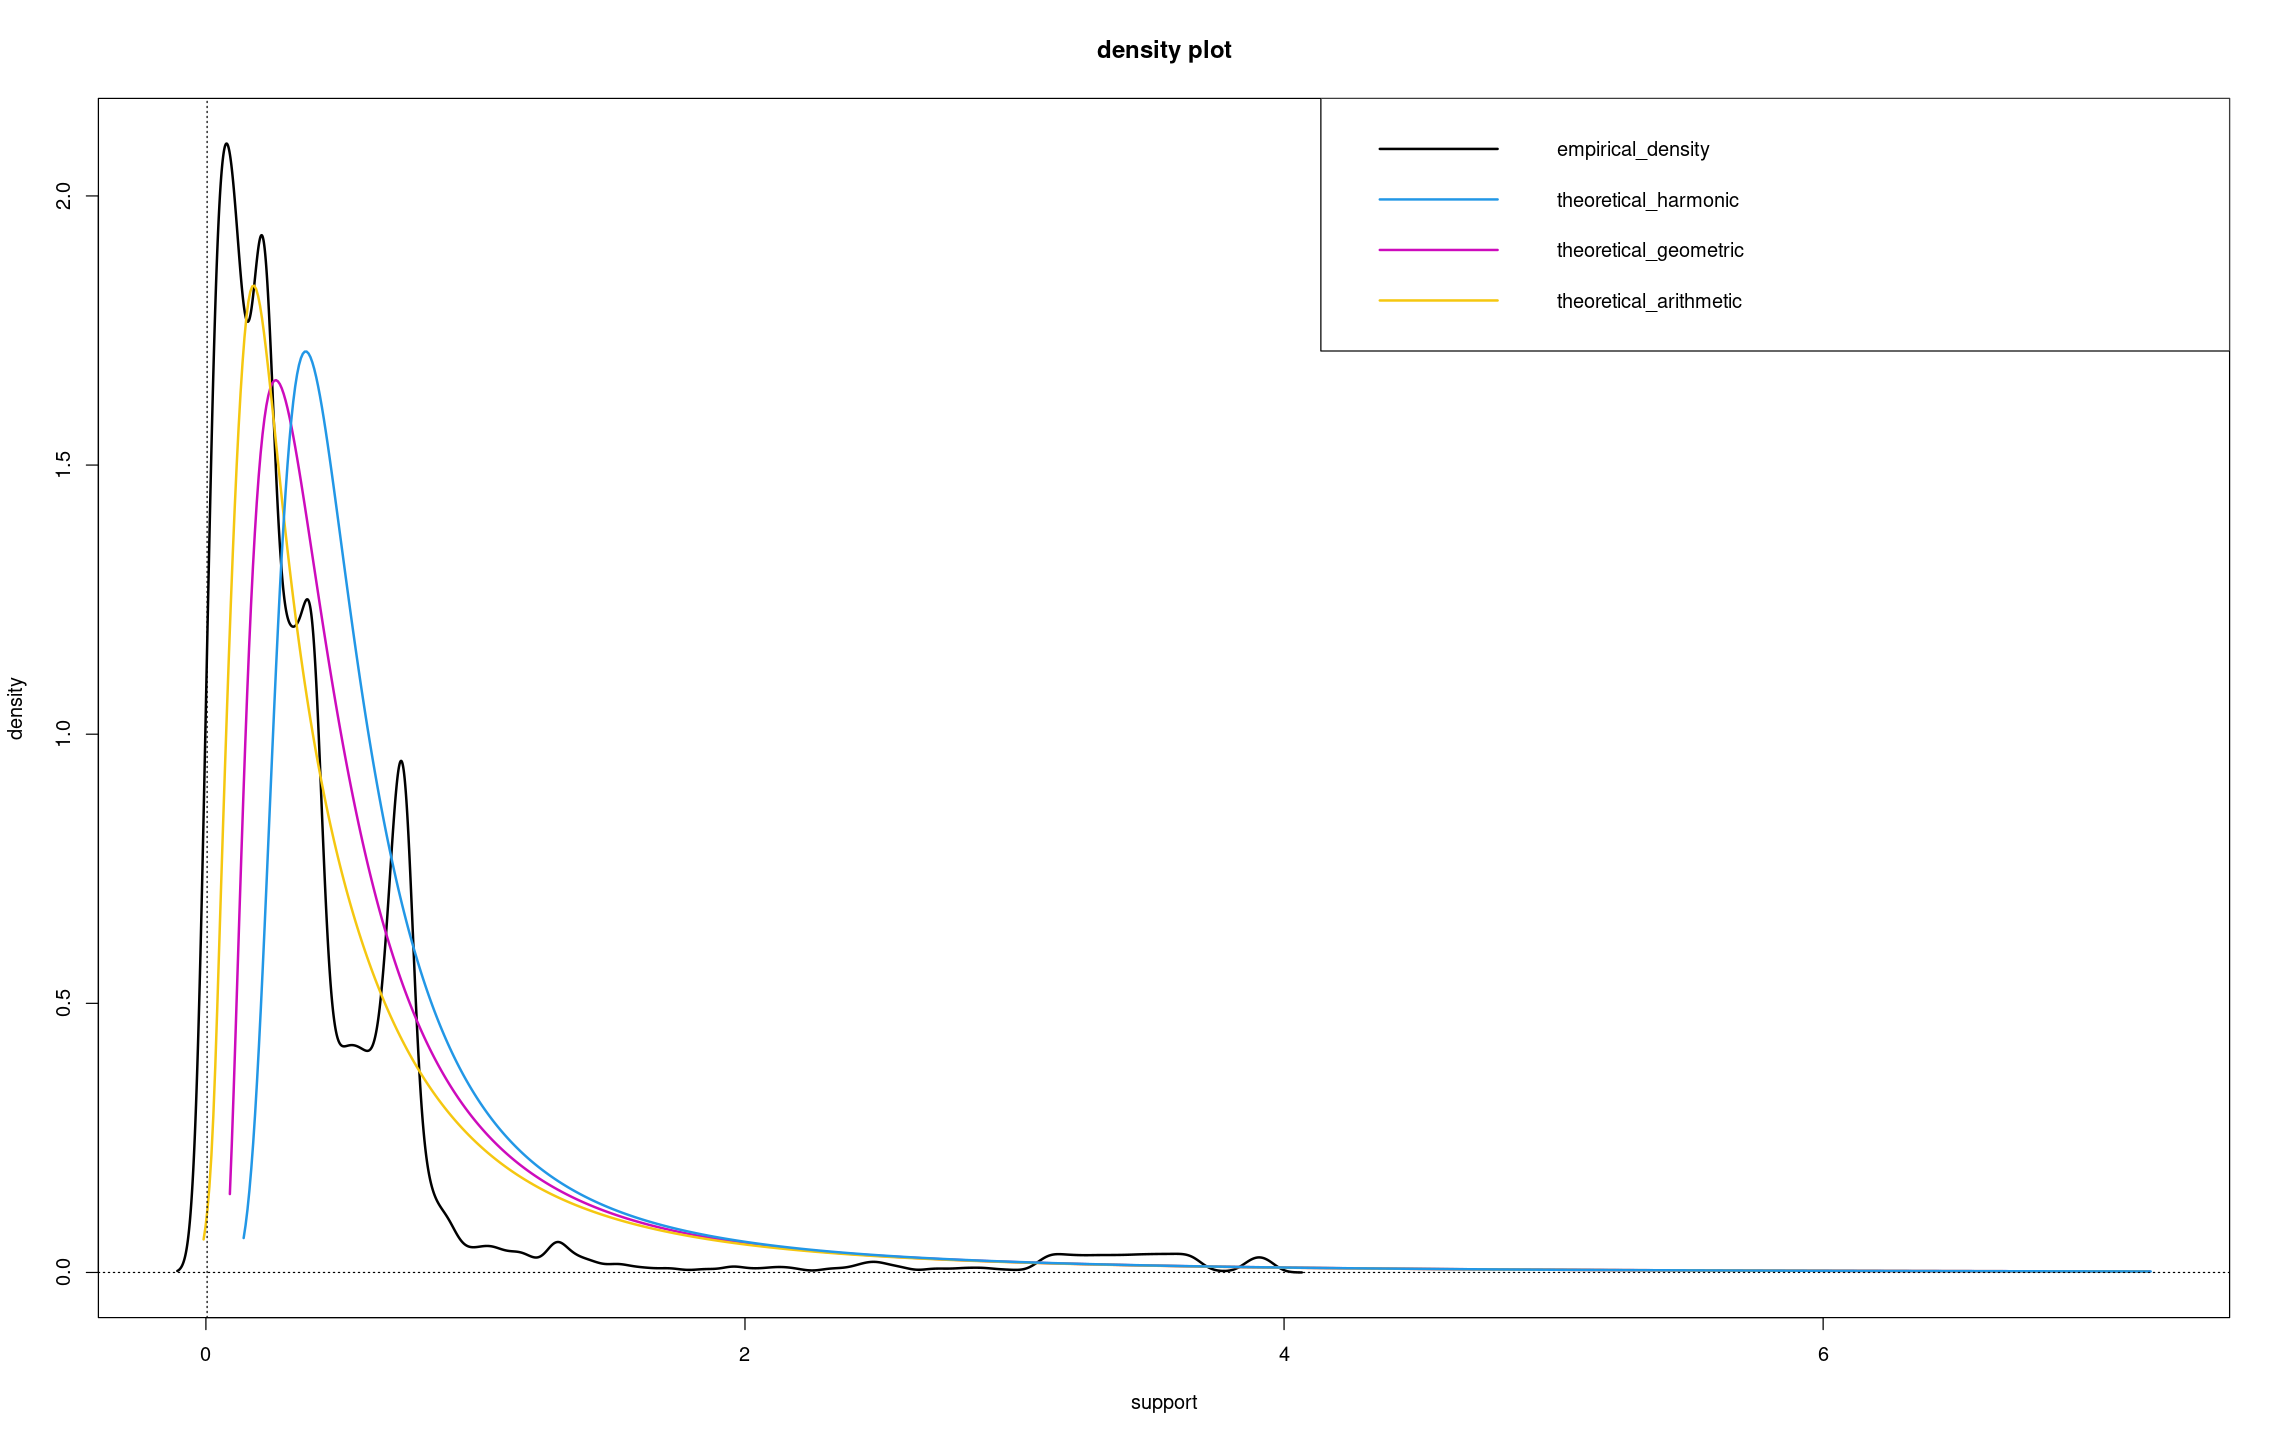

In [105]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = 0,
                                          zoom_threshold = NULL,
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

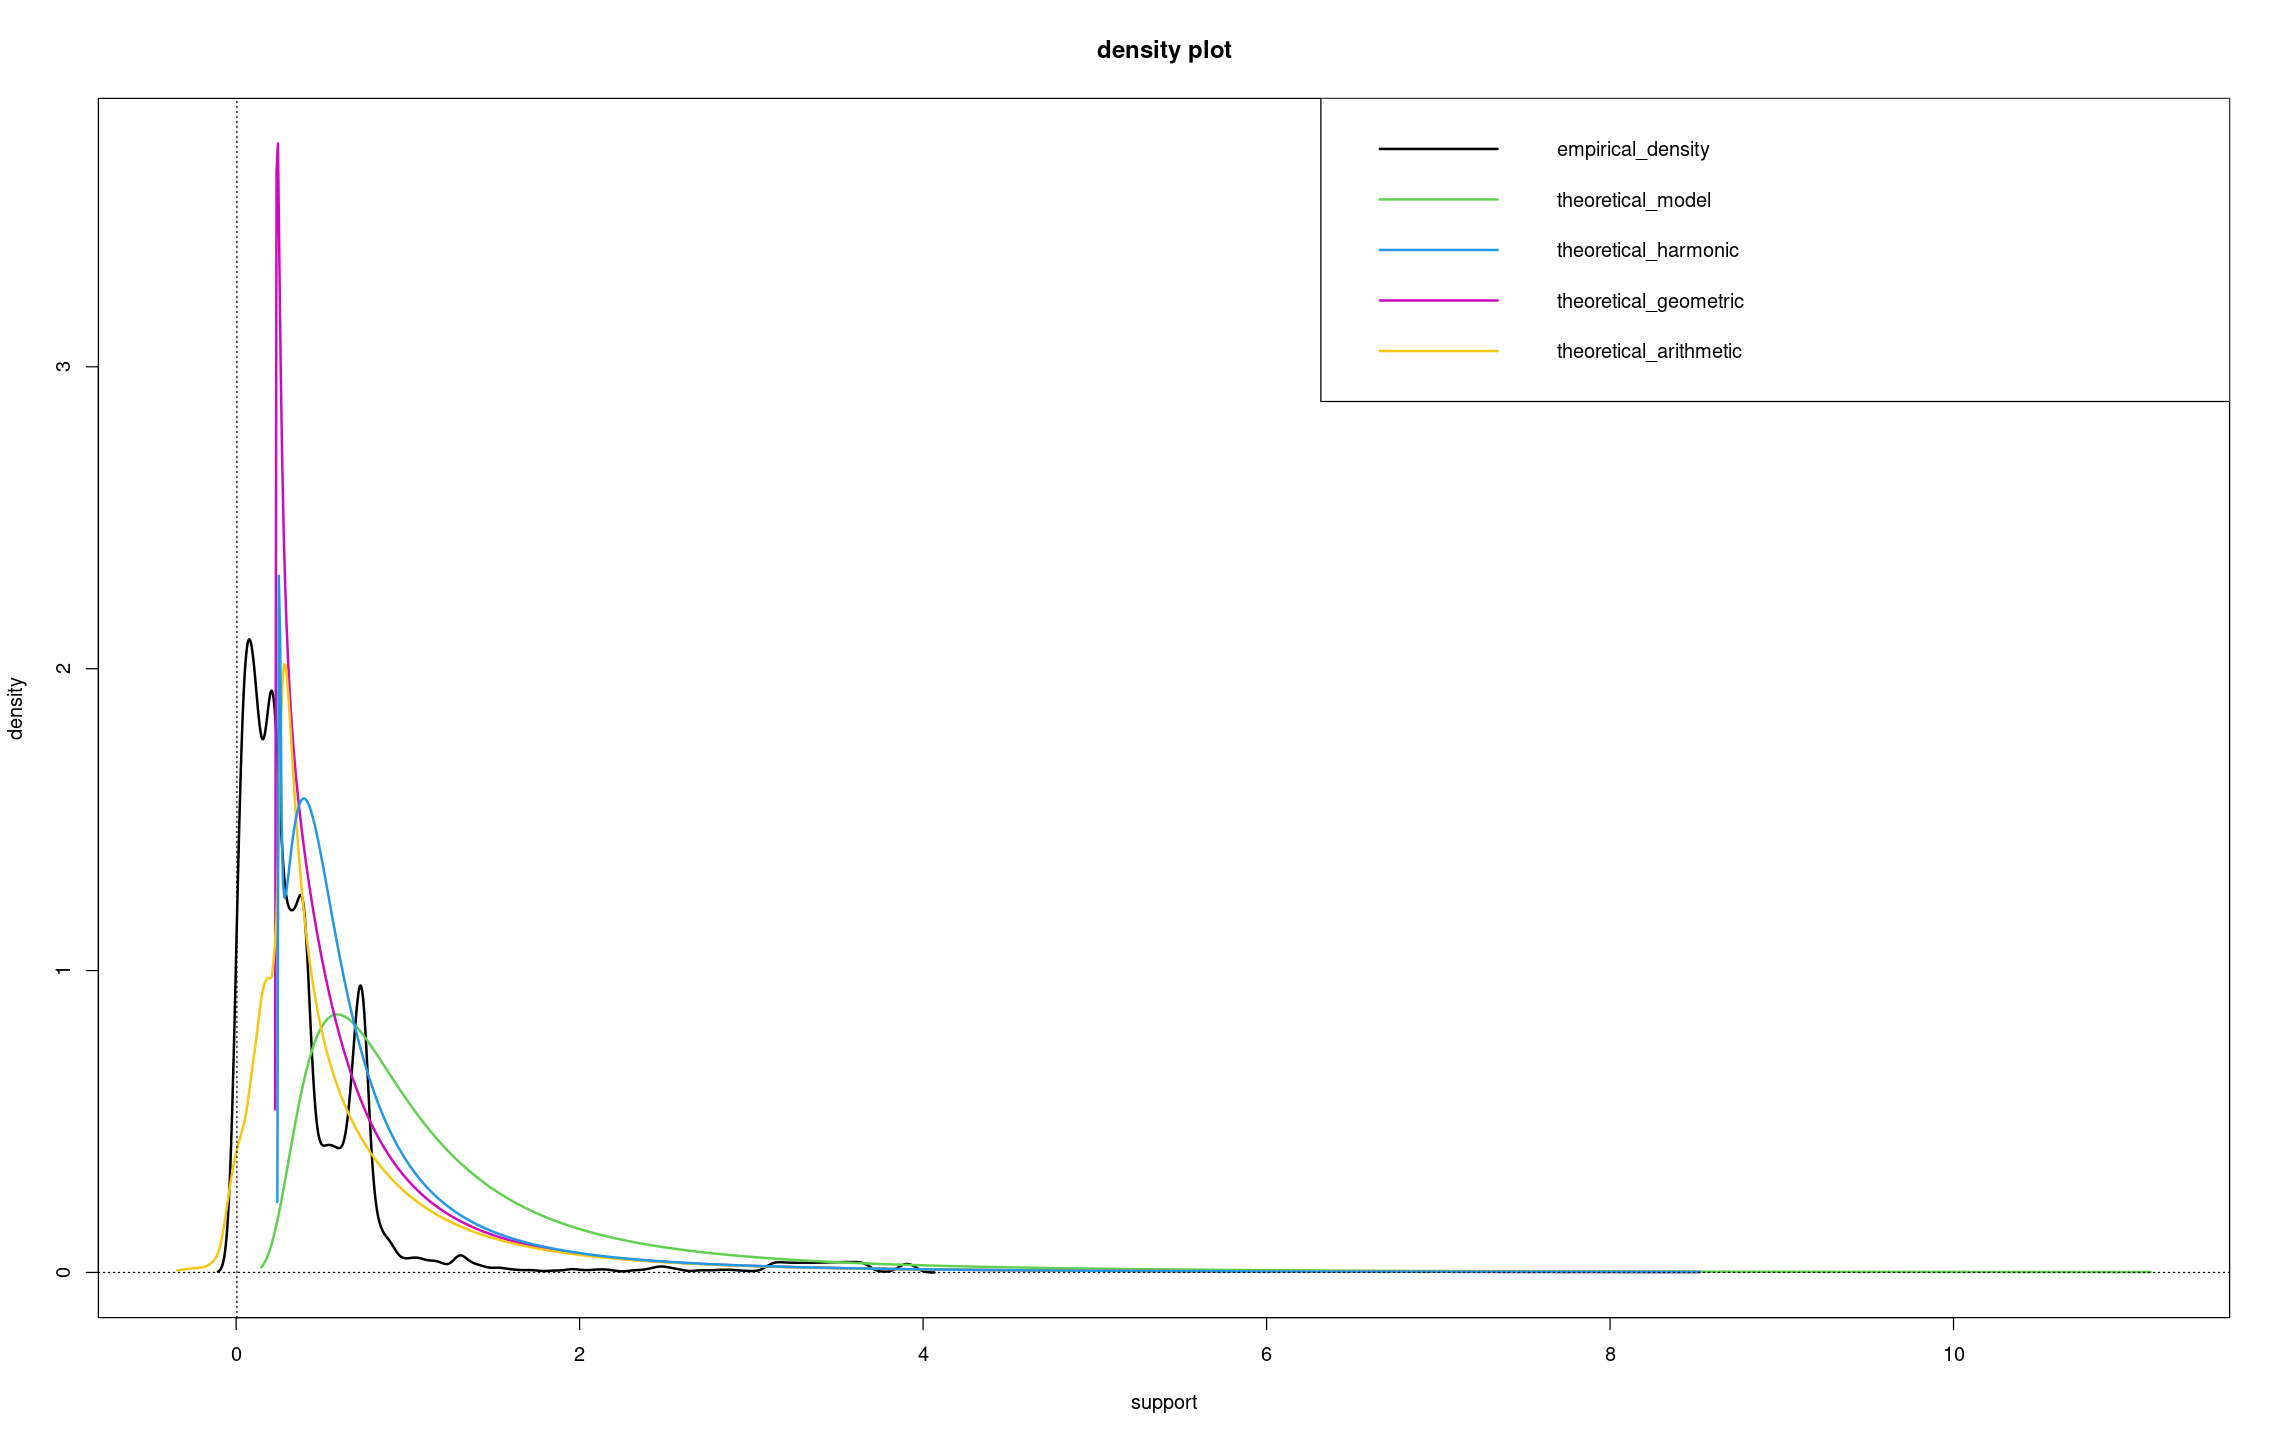

In [48]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = which.max(ns_gev_mixture_model_object$weights),
                                          zoom_threshold = NULL,
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

## Quantiles

In [110]:
partial_data_covariates_scaled <- ns_gev_mixture_model_object$partial_data_covariates$name_car

partial_data_covariates_scaled_range <- seq(from = min(partial_data_covariates_scaled), 
                                            to = max(partial_data_covariates_scaled), 
                                            length.out = 100)

partial_data_covariates_scaled <- data.frame("name_car" = partial_data_covariates_scaled_range)

tail(partial_data_covariates_scaled)

,name_car
,<dbl>
95,3.903344386
96,3.968802731
97,4.034261076
98,4.099719420
99,4.165177765
100,4.230636110


In [58]:
length(partial_data_observations)

[1] 537

### alpha = n^(-1)

In [113]:
alpha <- n^(-1)

print(alpha)

[1] 4.661570017e-05


In [ ]:

quantiles_1 <- sapply(1:nrow(partial_data_covariates_scaled), function(index){
    #new_data_covariates_scaled <- dplyr::slice(partial_data_covariates, index)

    results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = partial_data_covariates_scaled,
                                                                        do.ci = FALSE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 10)

    results_geometric$covariates_1$gev_mixture_model_quantile
})


In [61]:
tail(quantiles_1)

[1] 201.9577910 201.9585901 201.9630446 201.9580447 201.9593778 201.9640521

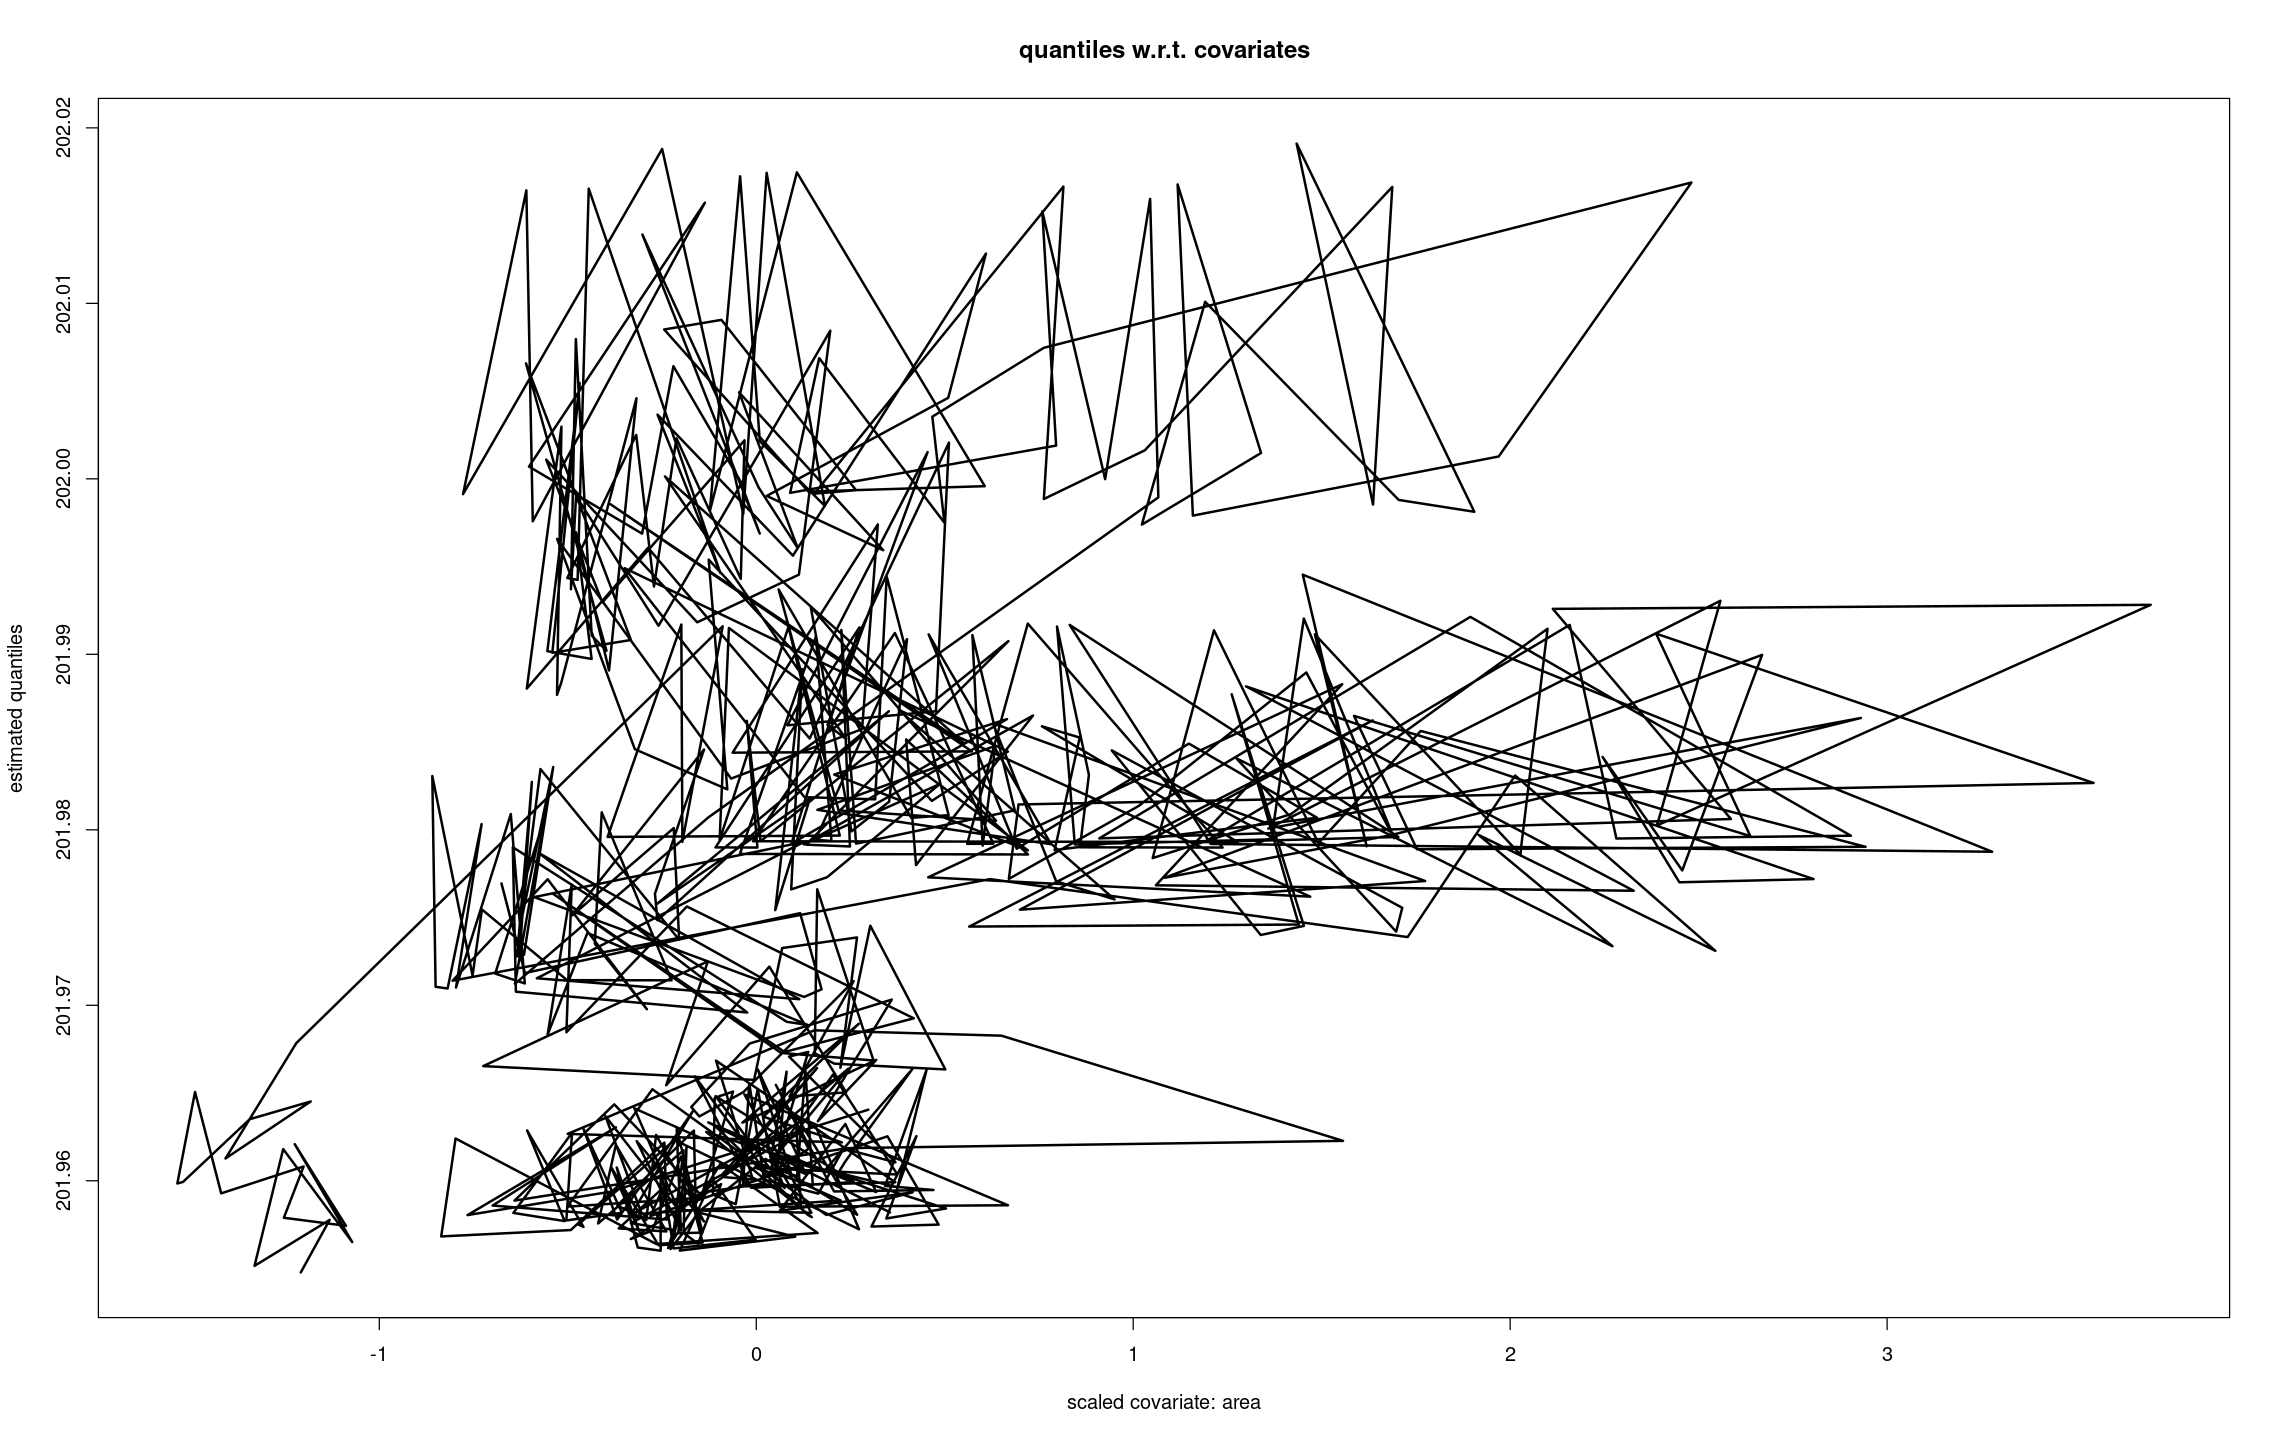

In [62]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$area, 
     y = quantiles_1,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: area",
     ylab = "estimated quantiles")

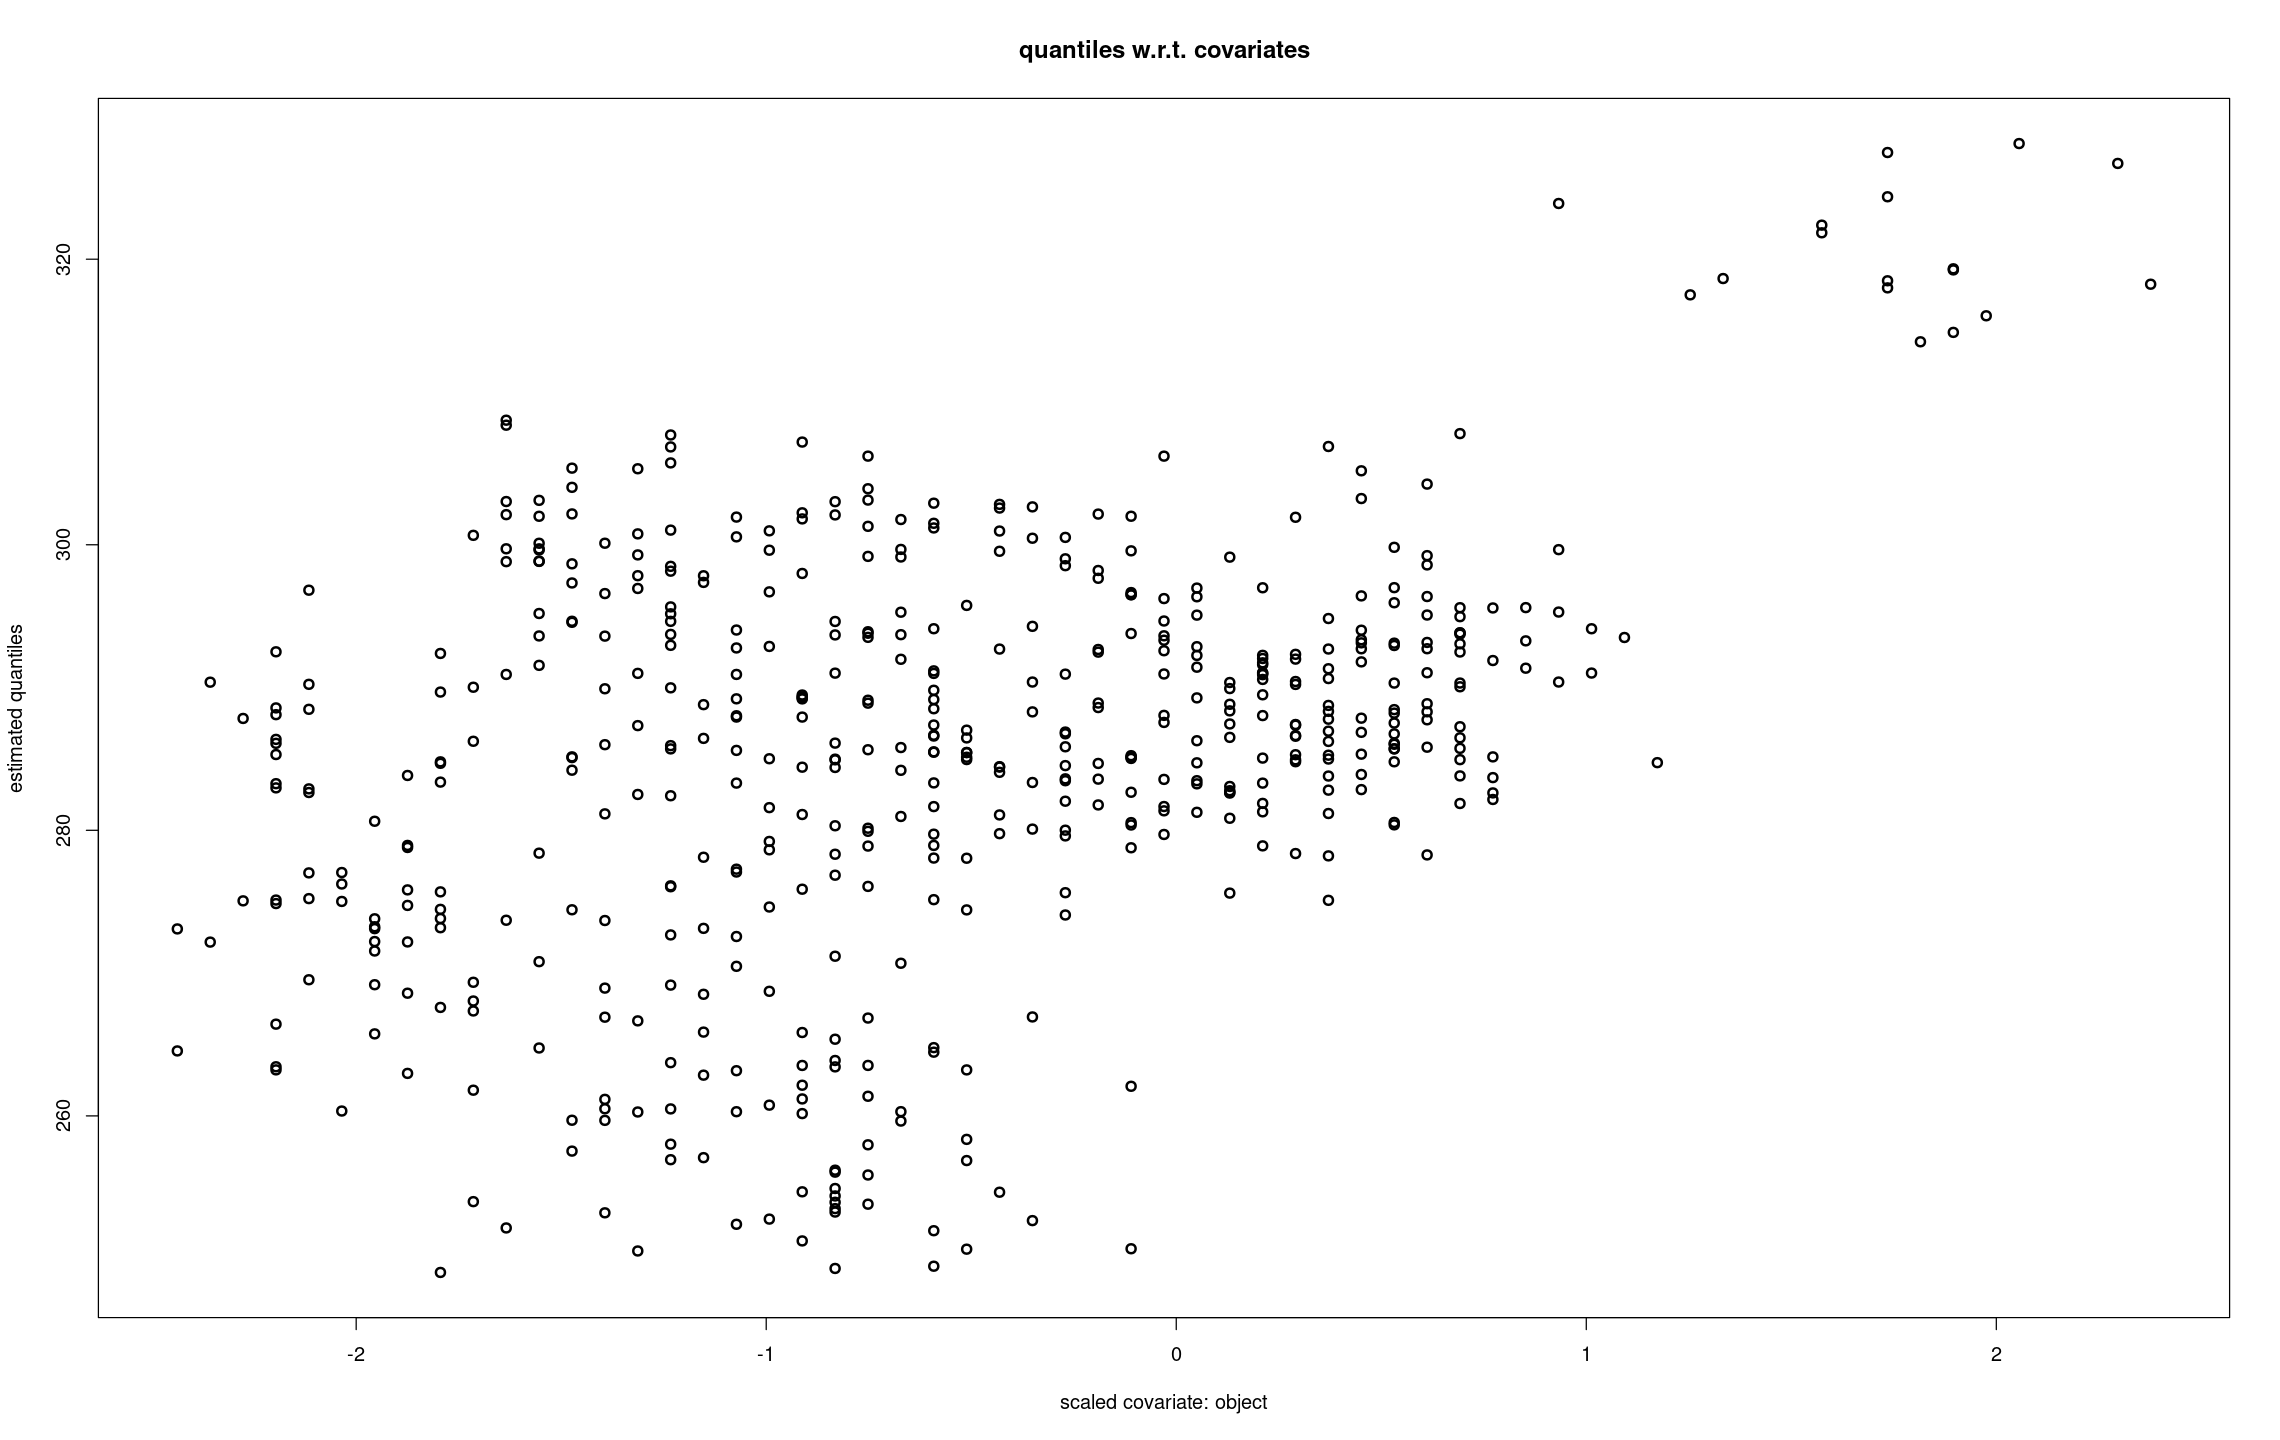

In [57]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$object, 
     y = quantiles_1,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: object",
     ylab = "estimated quantiles")

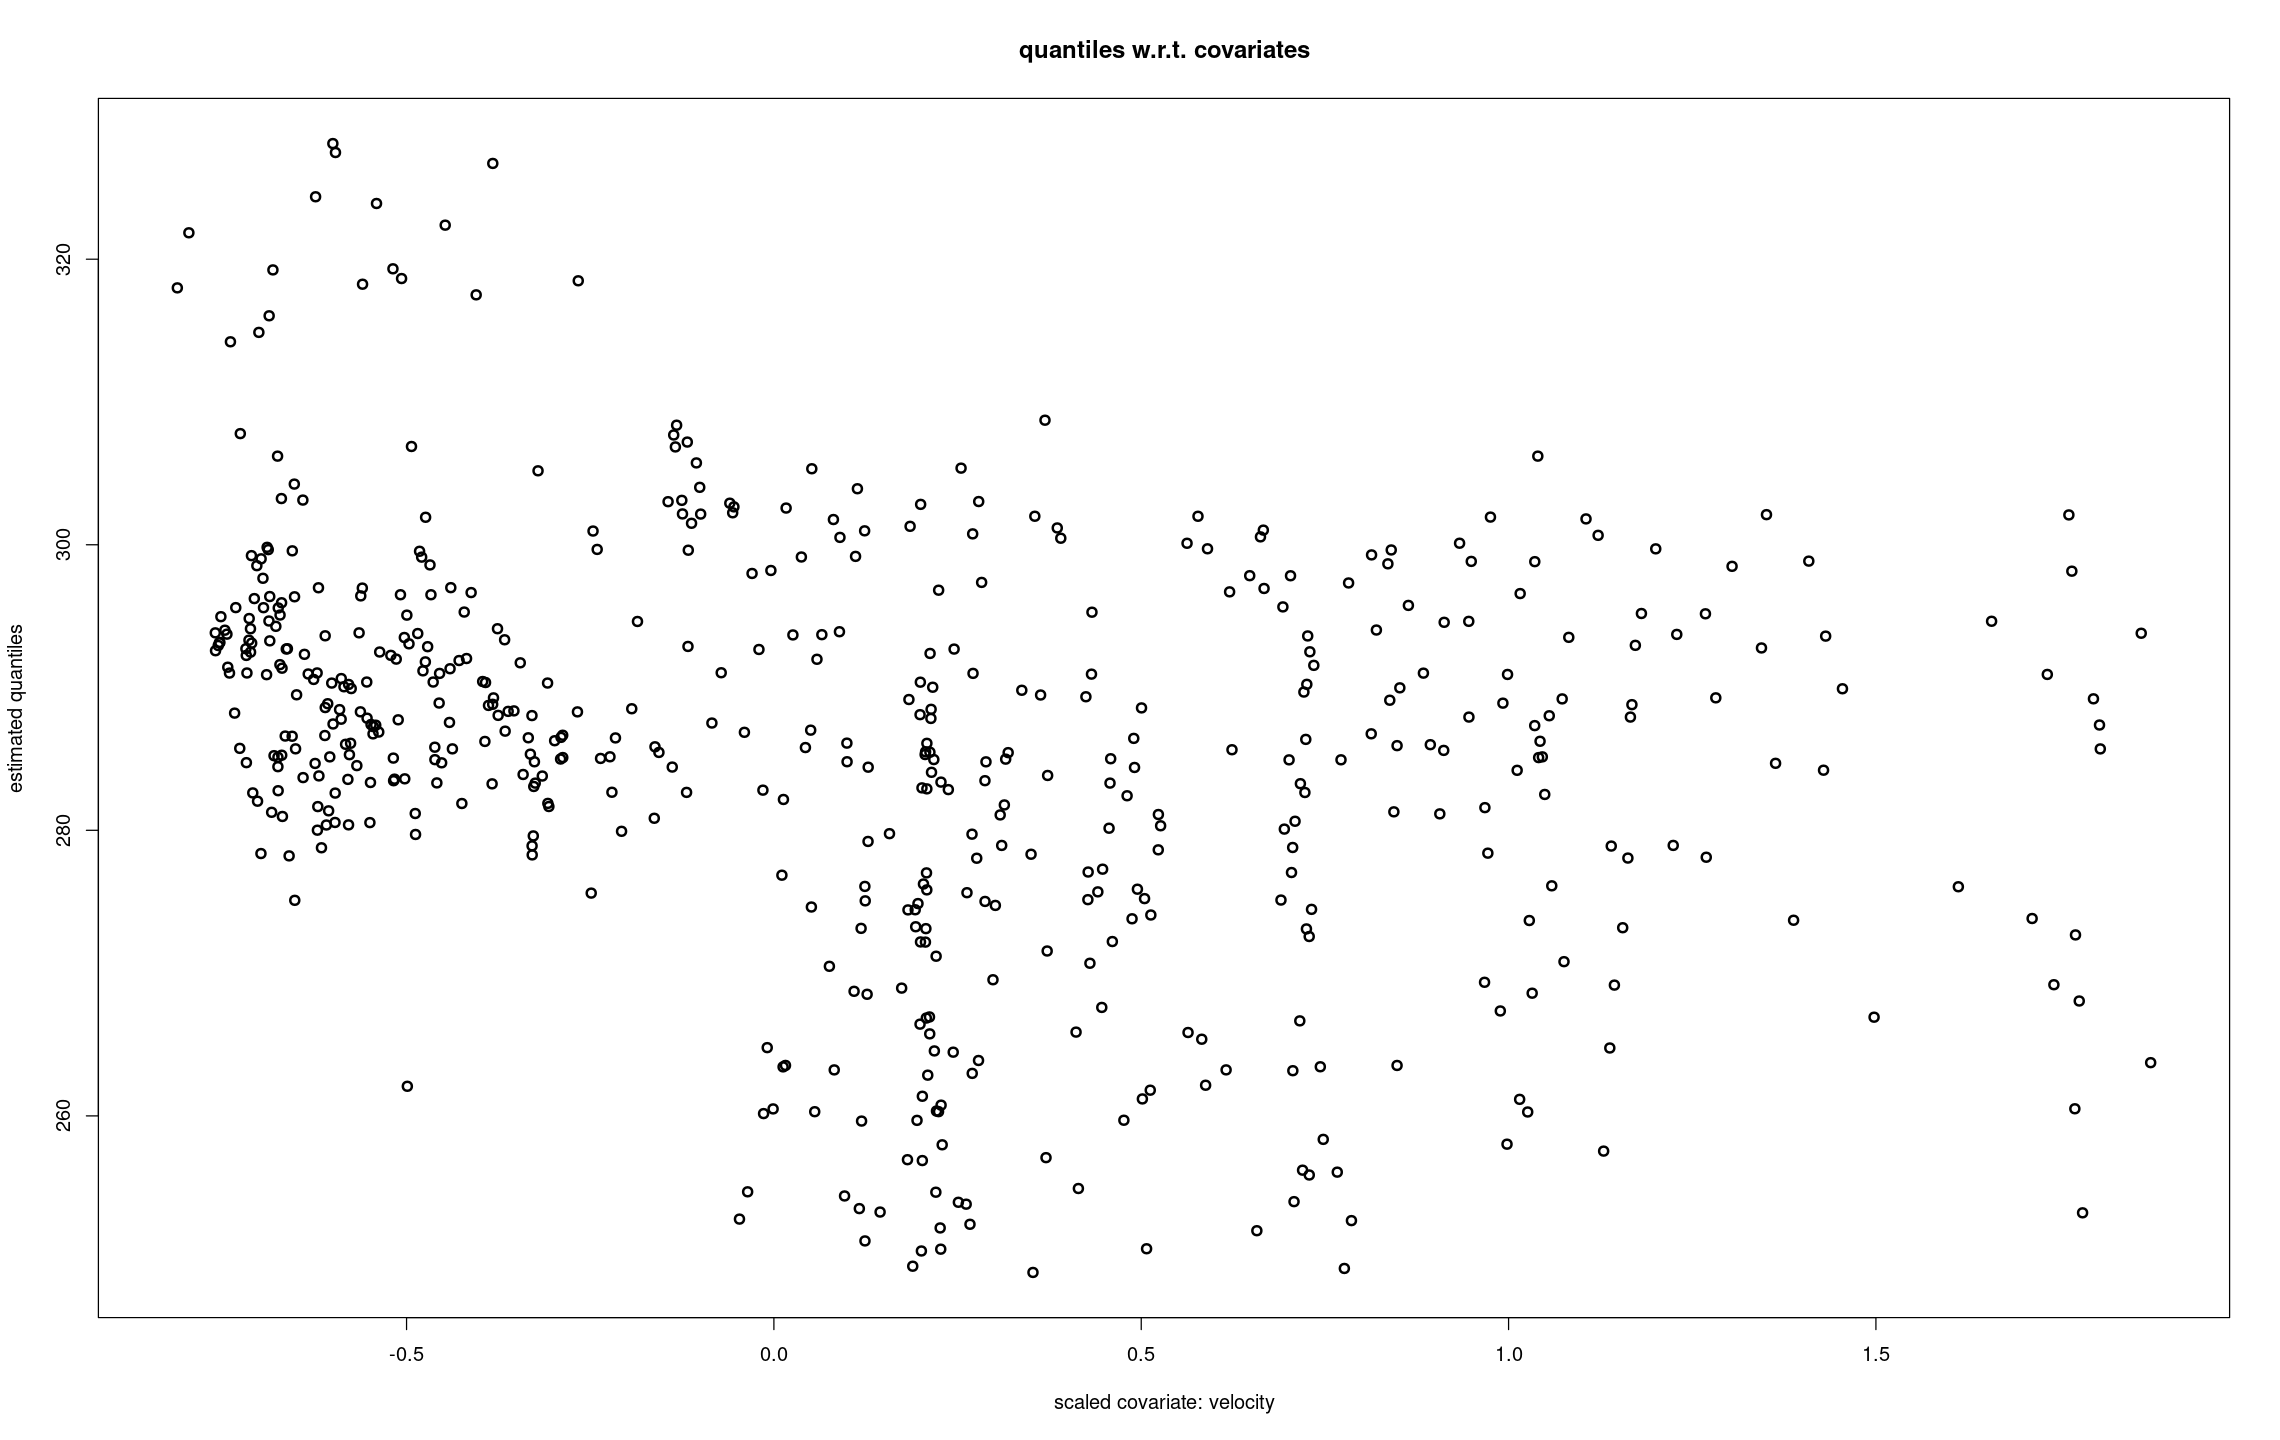

In [58]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$velocity, 
     y = quantiles_1,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: velocity",
     ylab = "estimated quantiles")

### alpha = n^(-2)

In [59]:
alpha <- n^(-2)

print(alpha)

[1] 2.173023502e-09


In [60]:

quantiles_2 <- sapply(1:nrow(partial_data_covariates), function(index){
    new_data_covariates_scaled <- dplyr::slice(partial_data_covariates, index)

    results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = new_data_covariates_scaled,
                                                                        do.ci = FALSE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 10)

    results_geometric$covariates_1$gev_mixture_model_quantile
})


In [61]:
tail(quantiles_2)

[1] 1155210.074 1223013.489 1173995.506 1232712.214 1176568.958 1081516.266

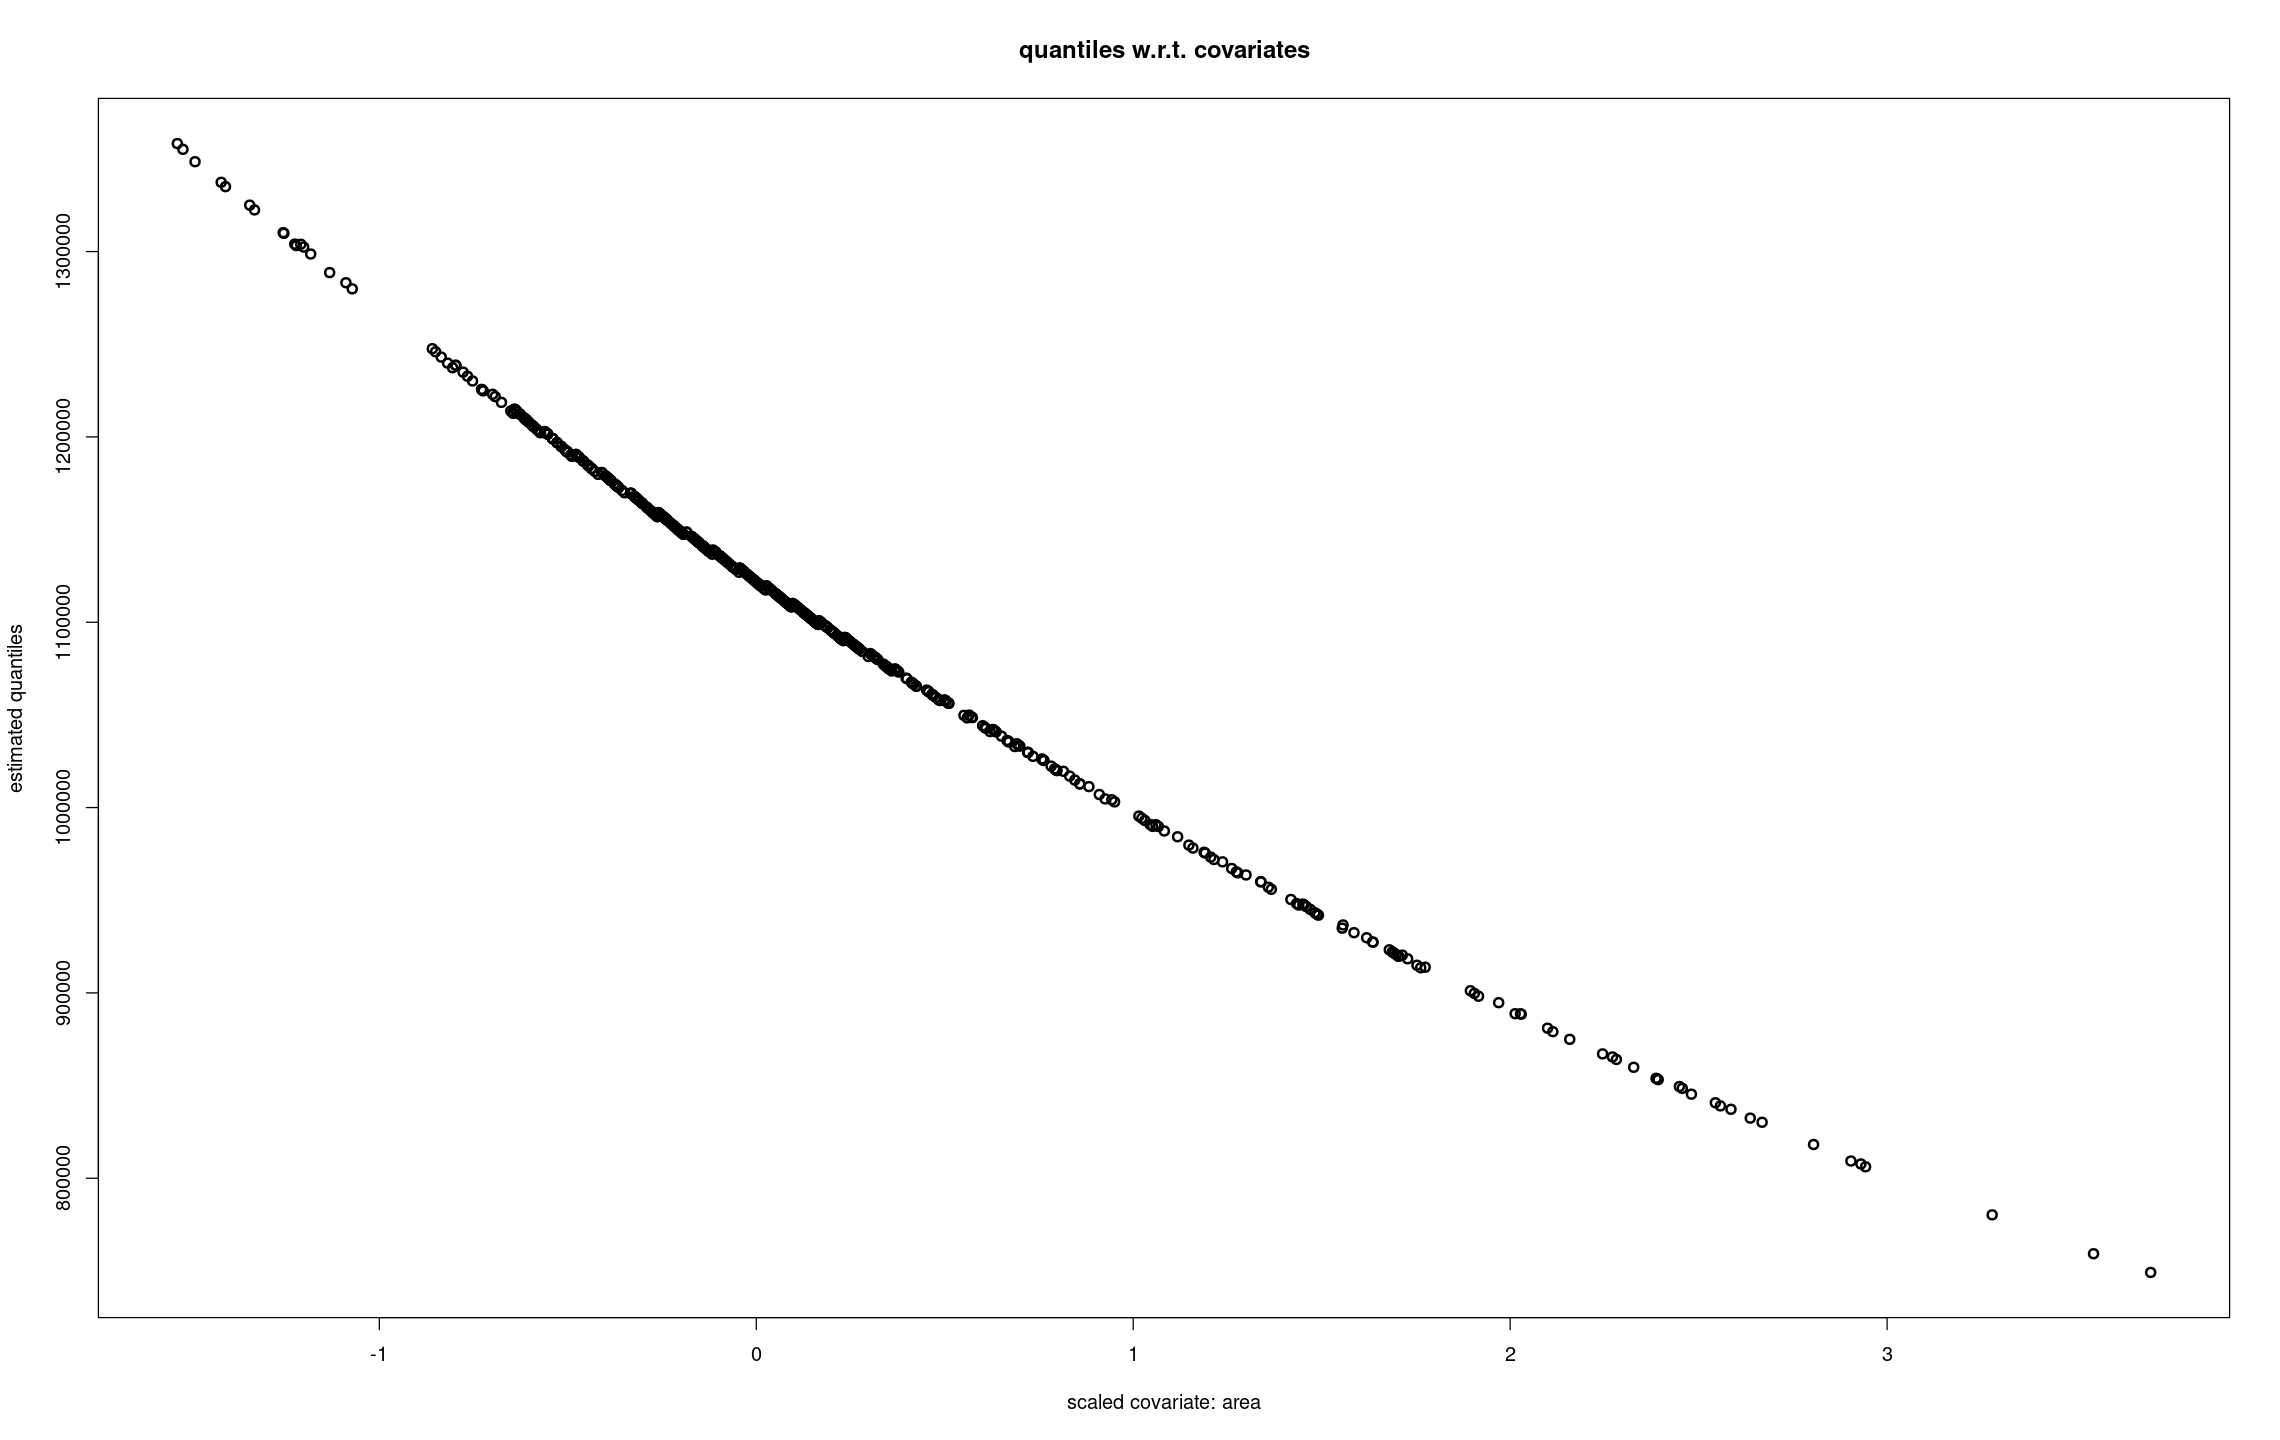

In [62]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$area, 
     y = quantiles_2,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: area",
     ylab = "estimated quantiles")

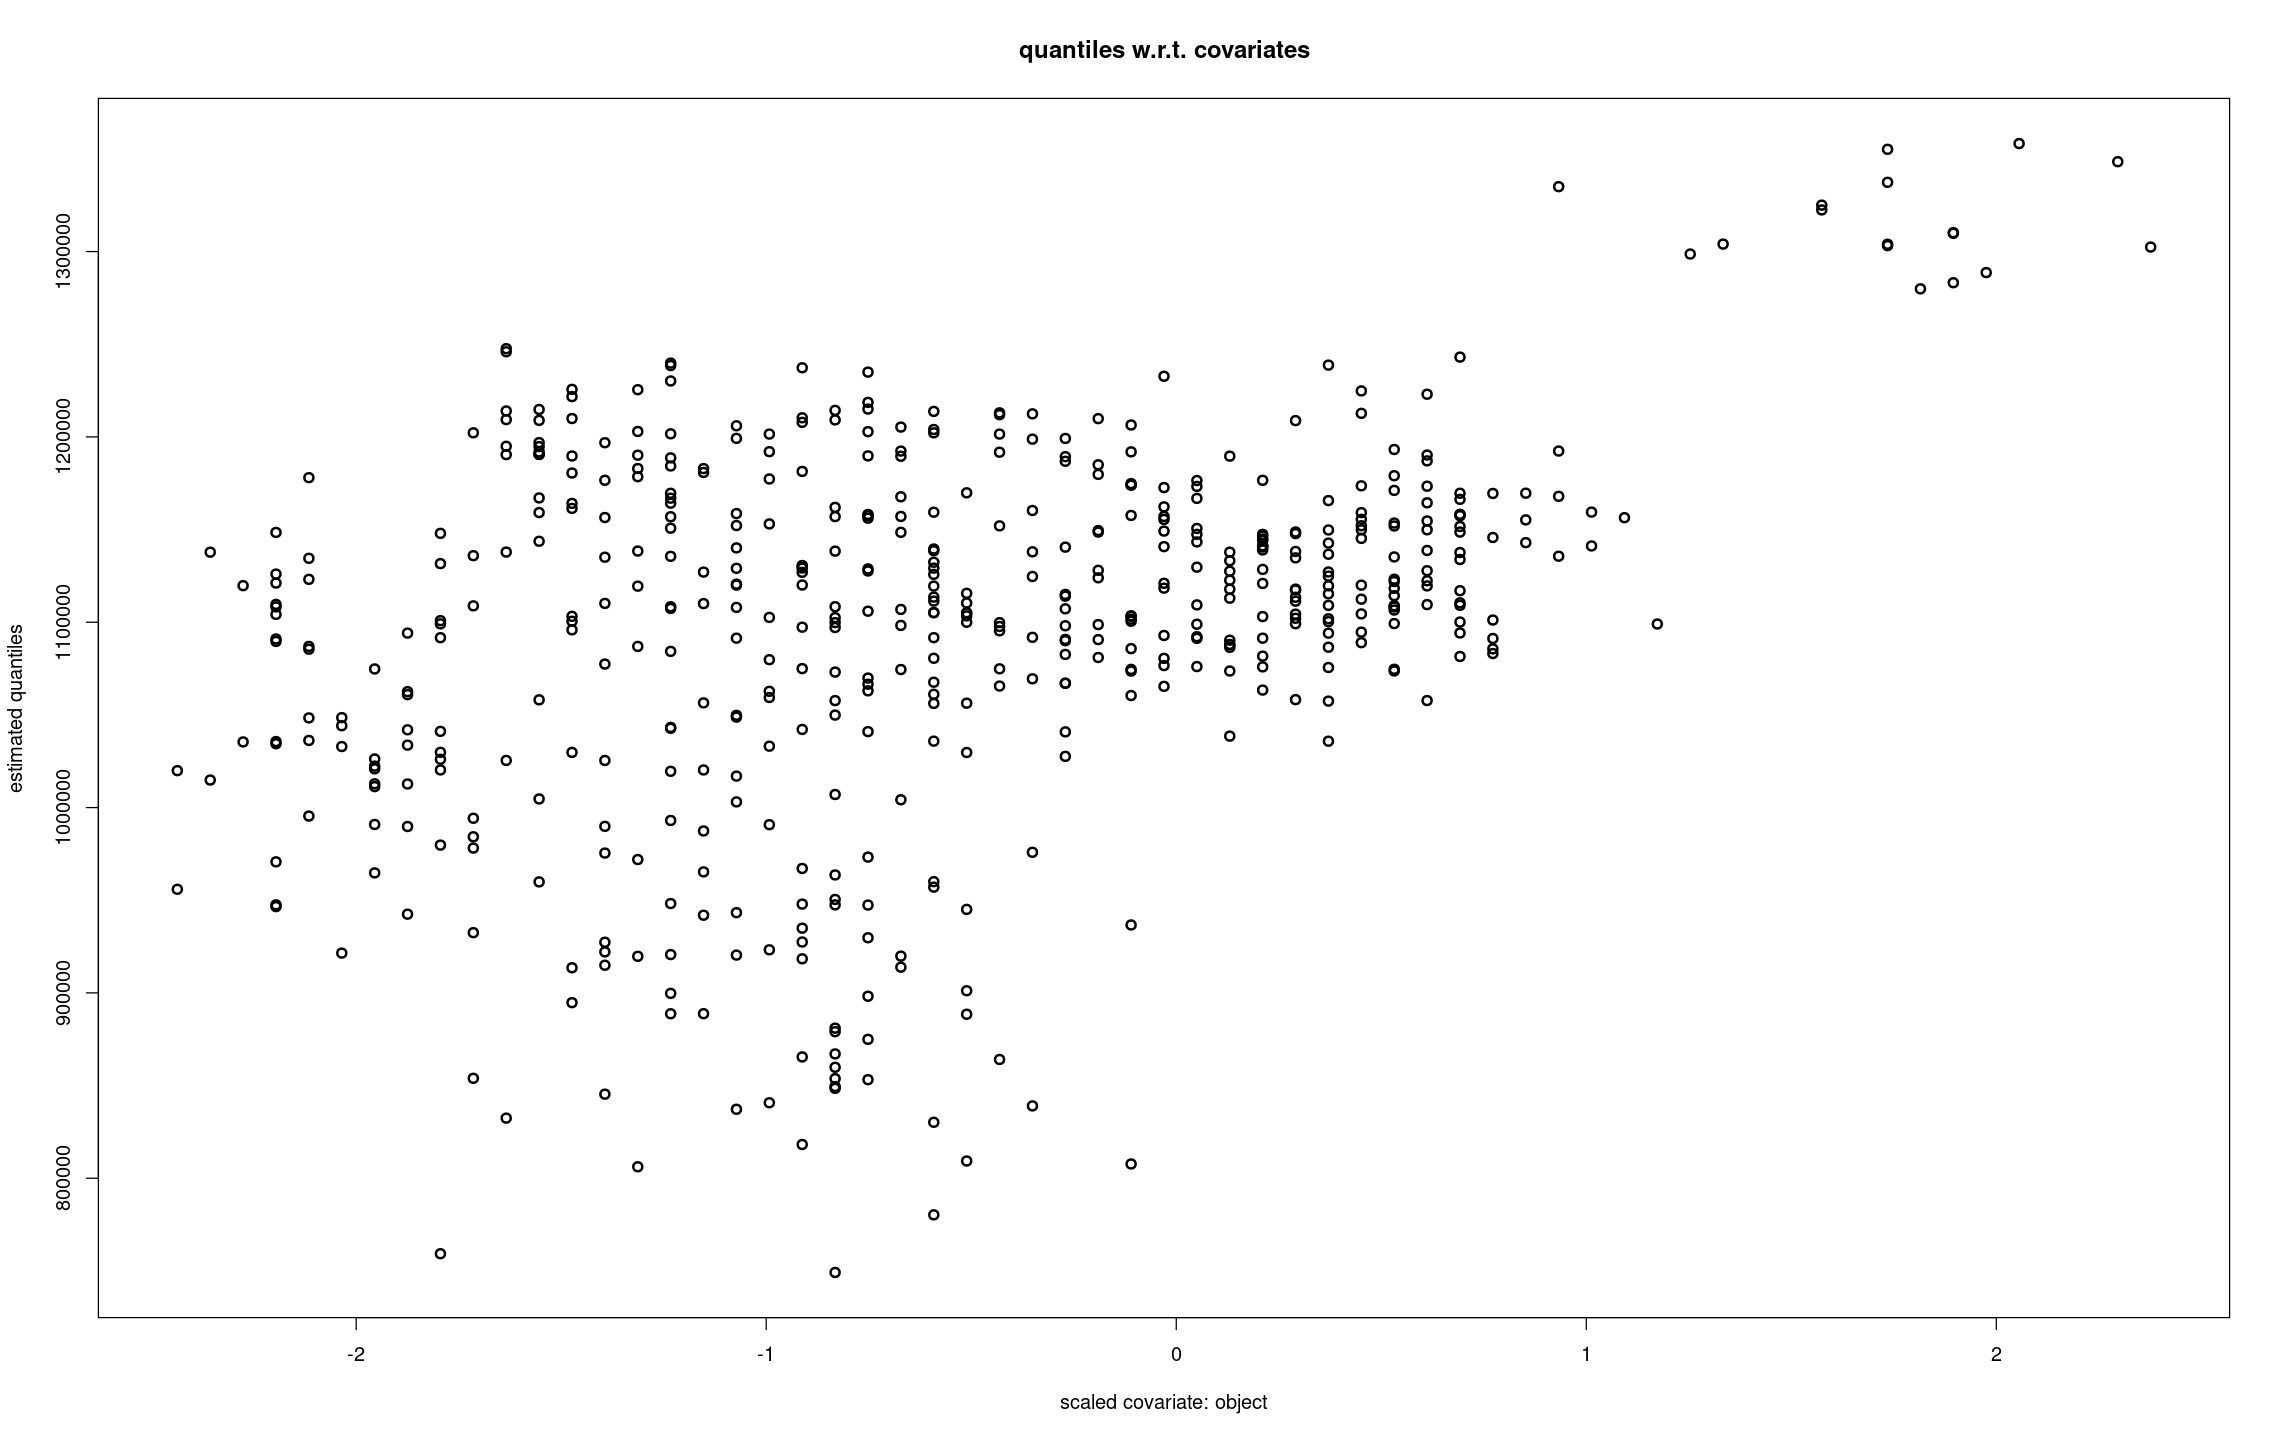

In [63]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$object, 
     y = quantiles_2,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: object",
     ylab = "estimated quantiles")

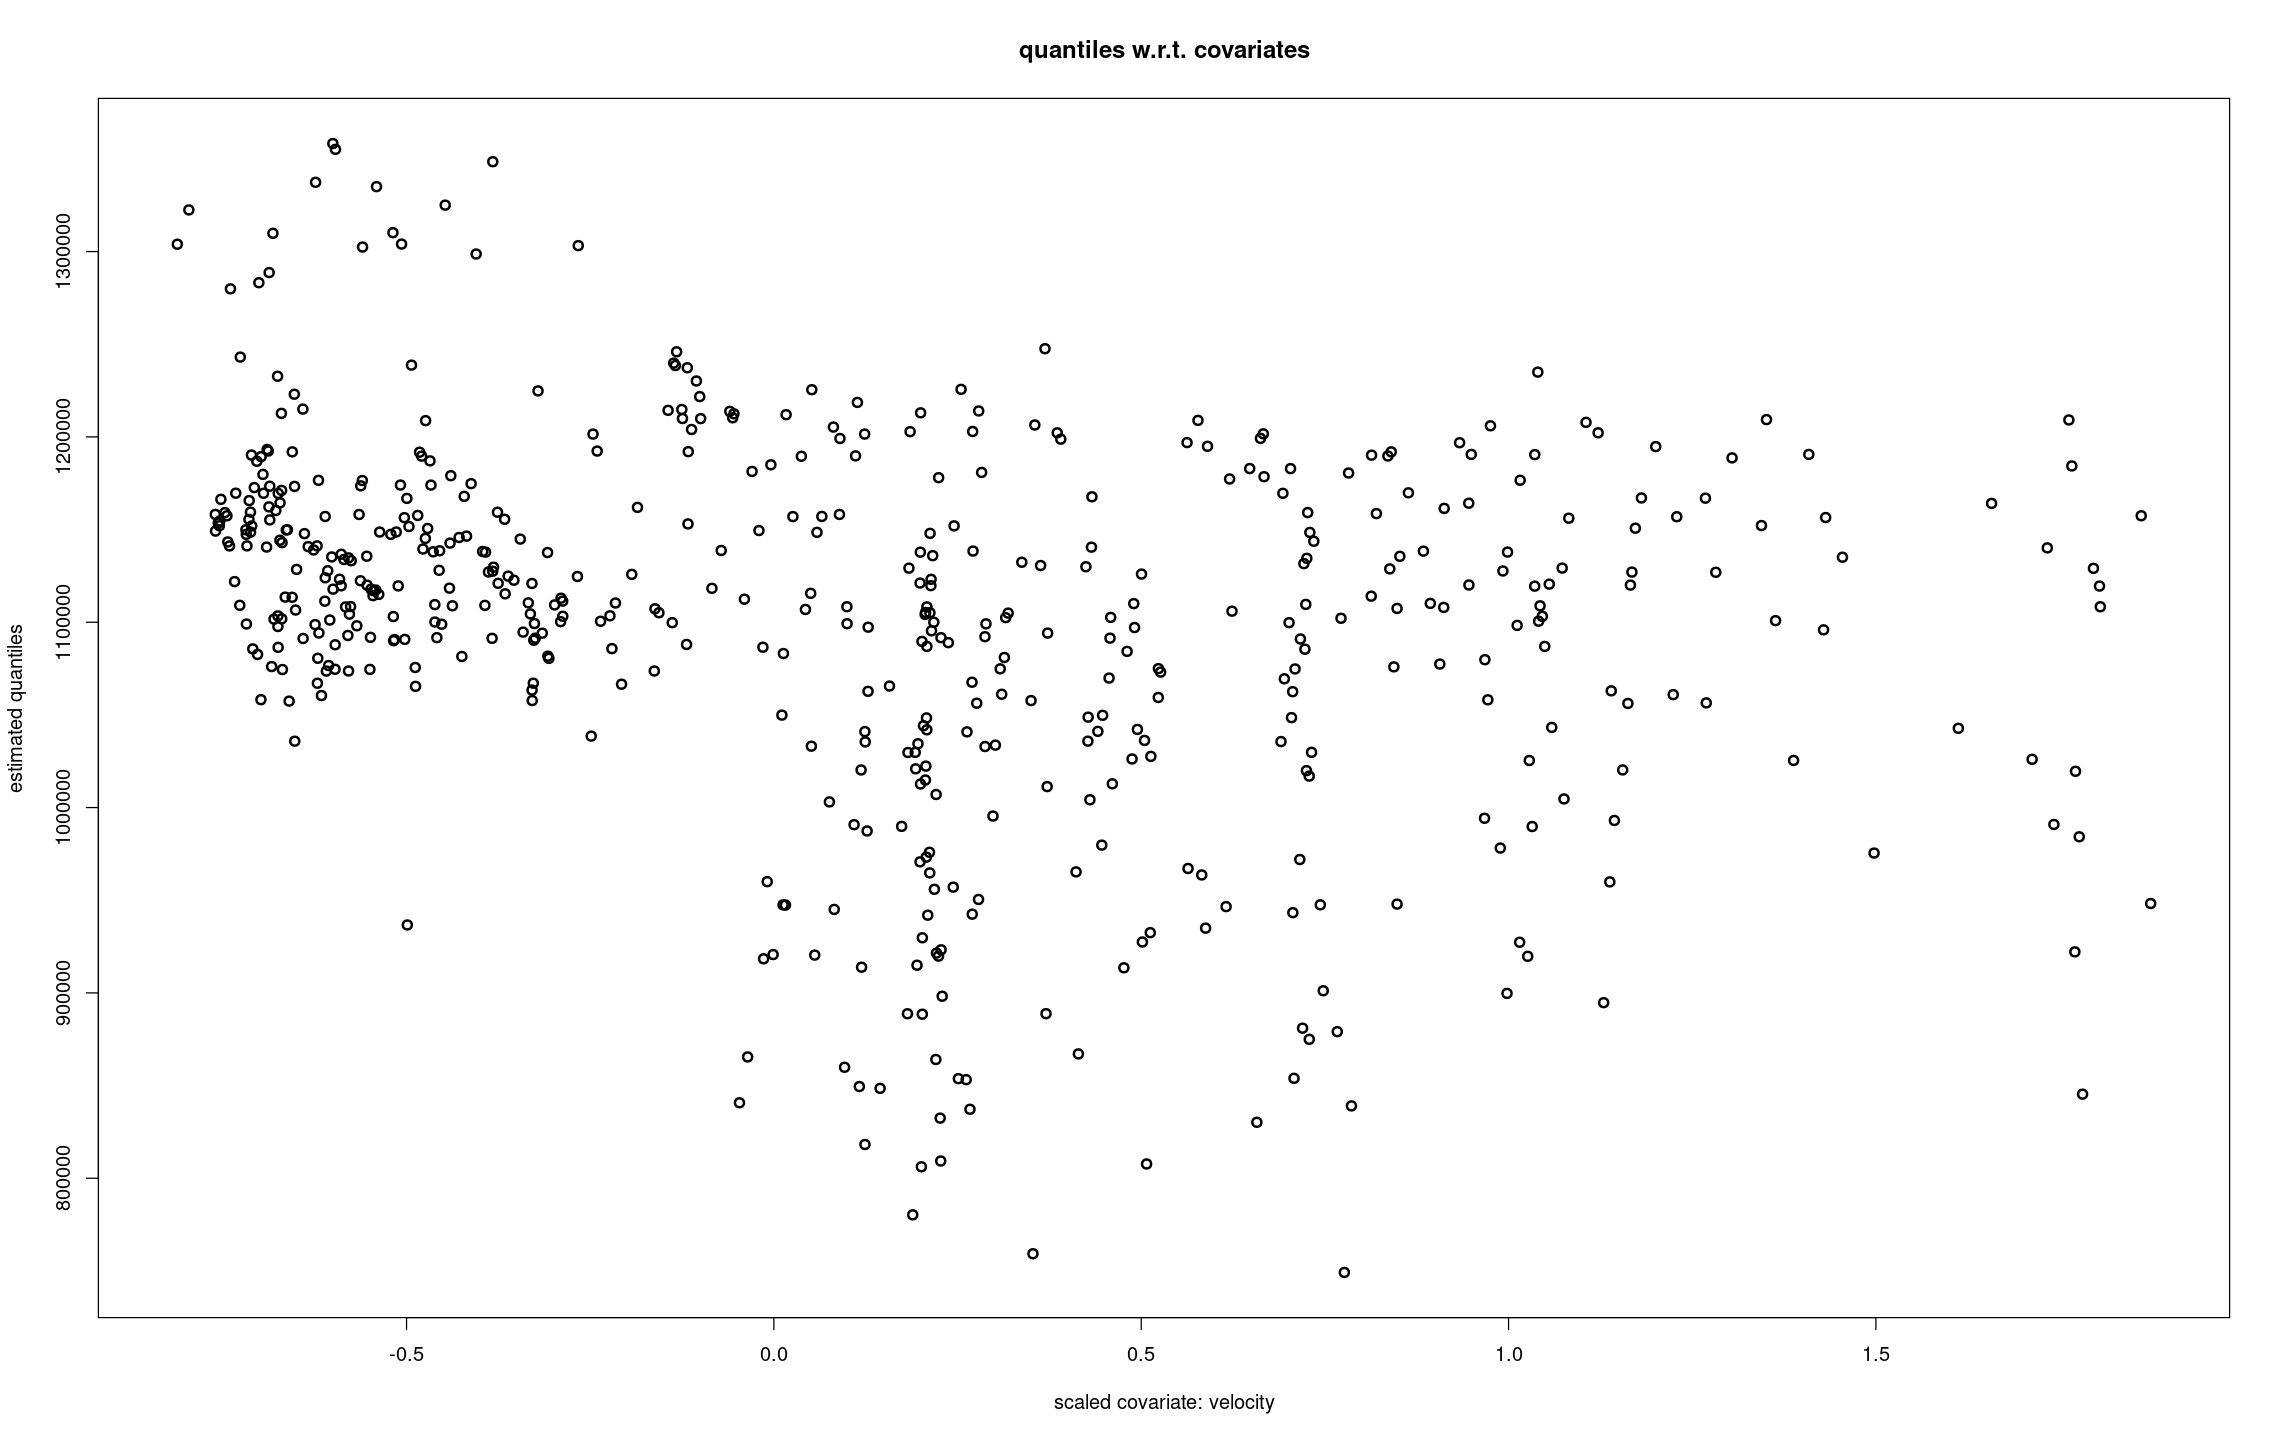

In [64]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$velocity, 
     y = quantiles_2,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: velocity",
     ylab = "estimated quantiles")

### alpha = 10^(-6)

In [46]:
alpha <- n^(-1)

print(alpha)

[1] 4.661570017e-05


In [47]:
true_quantile <- NULL

print(true_quantile)

NULL


In [48]:
0.01*23000

[1] 230

In [68]:
new_data_covariates <- data.frame(velocity = 10^(-12),
                                  object = 0.8,
                                  area = 1)

new_data_covariates

velocity,object,area
<dbl>,<dbl>,<dbl>
1e-12,0.8,1


In [69]:
new_data_covariates_scaled <- get_standard_scaled_data(data_covariates_clean, newdata = new_data_covariates)

new_data_covariates_scaled

velocity,object,area
<dbl>,<dbl>,<dbl>
-1.303995484,-3.174102984,0.1658407322


In [49]:
index <- which.max(x)

new_data_covariates <- dplyr::slice(data_covariates_clean, index)

new_data_covariates

velocity,object,area
<dbl>,<dbl>,<dbl>
6.662144592e-11,35,1.746722389


In [50]:
index <- which.max(x)

new_data_covariates_scaled <- dplyr::slice(data_covariates_clean_scaled, index)

# new_data_covariates_scaled <- dplyr::slice(ns_gev_mixture_model_object$all_data_covariates, index)

new_data_covariates_scaled

velocity,object,area
<dbl>,<dbl>,<dbl>
0.2204504324,-0.4309211992,2.28181814


In [51]:
several_ns_gev_models <- ns_gev_mixture_model_object$selected_full_ns_gev_models

predicted_parameters <- get_several_ns_gev_model_normalized_parameters(several_ns_gev_models = several_ns_gev_models,
                                                                       data = new_data_covariates_scaled,
                                                                       use_extremal_index = TRUE,
                                                                       normalize_parameters = TRUE)

do.call(rbind, predicted_parameters)

,location,scale,shape
,<dbl>,<dbl>,<dbl>
3,0.7088875196,0.4367330897,0.5094593483
4,0.5948020766,0.3770102545,0.5100818531
5,0.5924342286,0.3758567777,0.5129706299
6,0.5319798478,0.3436609036,0.5117529547
14,0.5048223984,0.3266817391,0.5194706693
24,0.4560626822,0.2975291376,0.5205765196
27,0.4265145953,0.2806691368,0.5202733356
30,0.4156234296,0.2738560801,0.5149850395
32,0.3941092978,0.2618050197,0.5110376391


In [52]:
results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = new_data_covariates_scaled,
                                                                        do.ci = TRUE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 100)

results_geometric

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
3,110.04680428,137.82929046,165.6117767
4,91.86130939,119.56102085,147.2607323
5,90.32511871,121.99771002,153.6703013
6,79.12953220,110.43722119,141.7449102
14,63.52786143,111.72704504,159.9262287
24,45.70470849,102.61762502,159.5305416
27,41.16304039,96.56561550,151.9681906
30,34.87761984,90.30635232,145.7350848
32,31.51548977,83.63099839,135.7465070


In [74]:
results_arithmetic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                         alpha = alpha,
                                                                         data = new_data_covariates_scaled,
                                                                         do.ci = TRUE,
                                                                         confidence_level = 0.95,
                                                                         kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                         iterations = 100)

results_arithmetic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
3,667.85784613,937.8583882,1207.858930
4,547.53657908,818.3568949,1089.177211
5,529.19225582,839.9764543,1150.760653
6,451.37239081,757.3017868,1063.231183
11,333.99754286,733.7754382,1133.553333
13,272.55329881,651.9242482,1031.295198
14,303.62411346,785.4010241,1267.177935
24,160.70341993,750.6113339,1340.519248
27,128.84361959,714.2938241,1299.744029


In [75]:
results_harmonic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                       alpha = alpha,
                                                                       data = new_data_covariates_scaled,
                                                                       do.ci = TRUE,
                                                                       confidence_level = 0.95,
                                                                       kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                       iterations = 100)

results_harmonic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
3,667.85784613,937.8583882,1207.858930
4,547.53657908,818.3568949,1089.177211
5,529.19225582,839.9764543,1150.760653
6,451.37239081,757.3017868,1063.231183
11,333.99754286,733.7754382,1133.553333
13,272.55329881,651.9242482,1031.295198
14,303.62411346,785.4010241,1267.177935
24,160.70341993,750.6113339,1340.519248
27,128.84361959,714.2938241,1299.744029


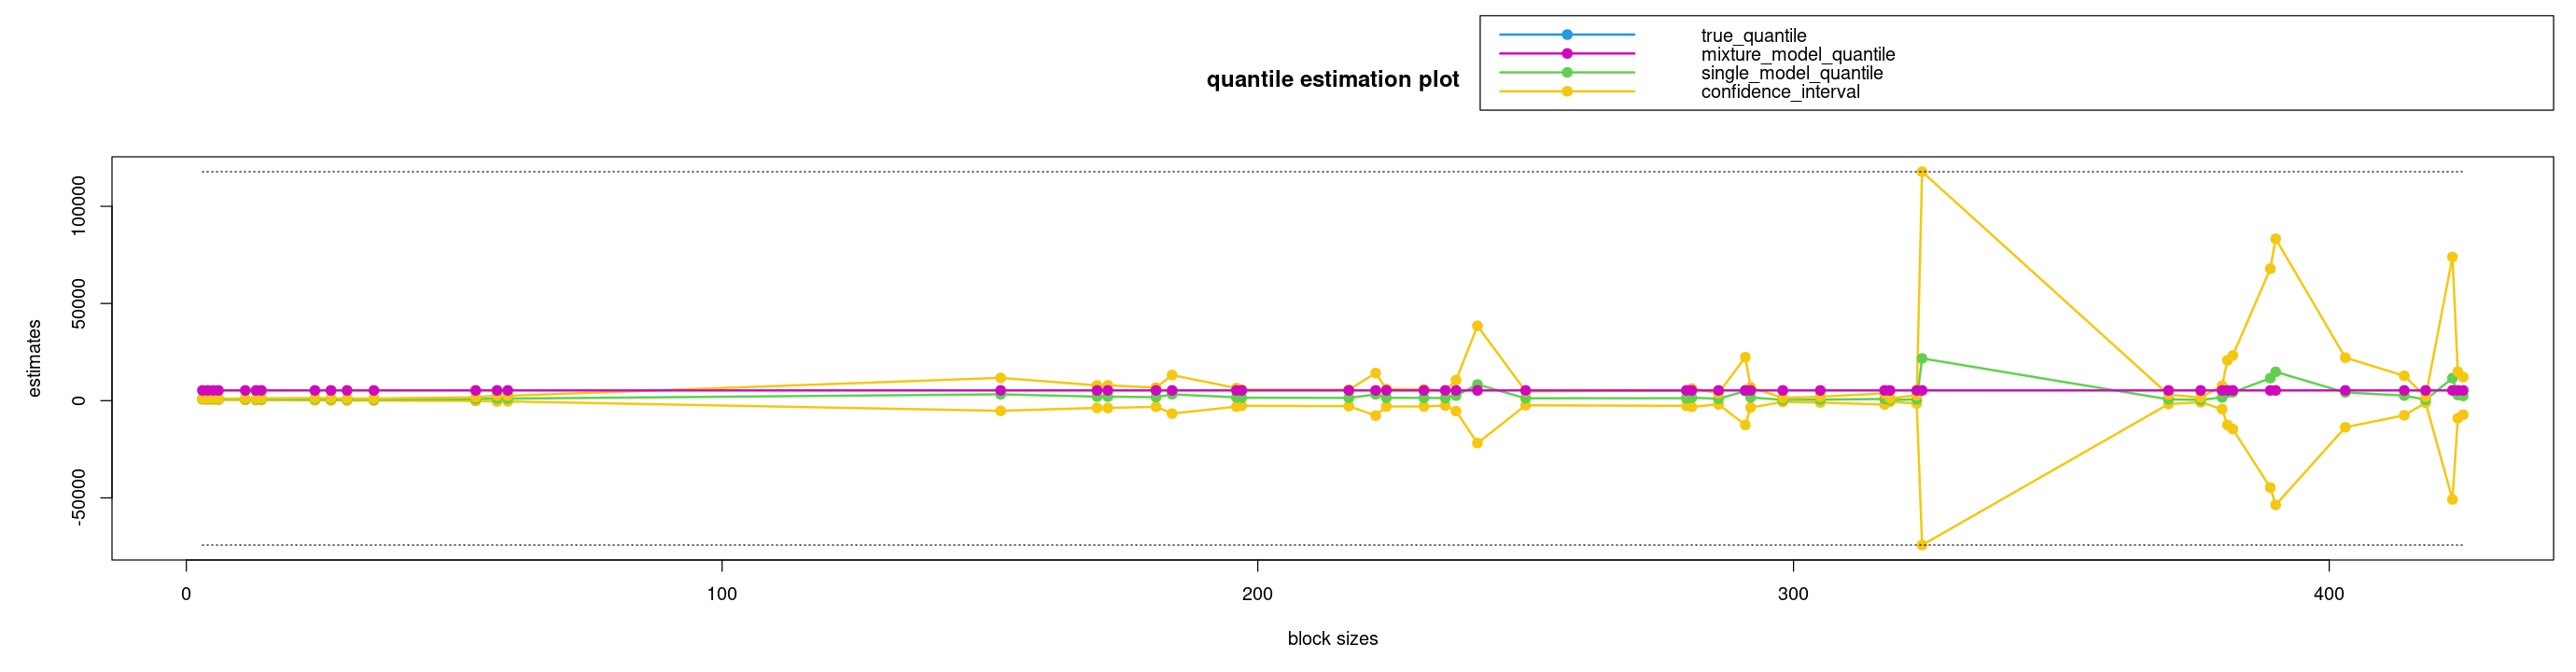

In [76]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                        alpha = alpha,
                                                        data = NULL,
                                                        data_index = 1,
                                                        true_quantile = NULL,
                                                        do.ci = TRUE,
                                                        confidence_level = 0.95,
                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                        iterations = 100,
                                                        xlab = "block sizes",
                                                        ylab = "estimates",
                                                        main = "quantile estimation plot",
                                                        legend_position = "topright")
